In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
data=pd.read_csv("tpm_data.csv", header=0)
data

,Unnamed: 0,ENSG,hgnc_symbol,gene_length,C_0002,C_0003,C_0004,C_0005,C_0006,C_0008,...,H_0740,H_0750,H_0513,H_0601,H_0656,H_0689,H_0709,H_0723,H_1104,H_1105
0,1,ENSG00000000003,TSPAN6,12883,2.703162,4.679815,3.827170,3.940771,3.956139,4.749555,...,4.799810,8.733498,3.666497,4.563176,2.492904,2.949728,3.314066,6.985665,3.947979,3.784485
1,2,ENSG00000000005,TNMD,14949,0.005418,0.029438,0.088121,0.036995,0.053272,0.108531,...,0.024476,0.086370,0.083015,0.078651,0.050749,0.014444,0.028001,0.138079,0.031214,0.064583
2,3,ENSG00000000419,DPM1,24273,2.625862,4.387499,4.450224,5.390720,3.707350,5.356800,...,4.100151,6.470481,5.783705,6.878268,3.167153,1.530000,6.380522,8.912018,6.420788,9.267549
3,4,ENSG00000000457,SCYL3,44636,0.896318,1.025353,1.568379,1.315815,1.617599,1.350063,...,0.610696,0.892573,1.098204,1.589228,0.708180,0.416006,0.628301,1.156094,1.317197,2.011547
4,5,ENSG00000000460,C1orf112,192073,0.033732,0.123724,0.065645,0.074862,0.063574,0.114637,...,0.030003,0.052817,0.036344,0.091820,0.025015,0.042717,0.034868,0.060181,0.072882,0.070371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21858,26560,ENSG00000273372,SFTPD-AS1,5000,0.680299,0.616103,0.715117,1.061834,1.061811,1.437003,...,0.311009,0.202893,0.201662,1.018982,0.050577,0.647750,0.000000,0.247696,0.559947,0.096546
21859,26565,ENSG00000273396,LINC01396,6639,0.036596,0.066286,0.226767,0.049981,0.119952,0.139644,...,0.013778,0.027783,0.000000,0.000000,0.038090,0.000000,0.000000,0.000000,0.000000,0.000000
21860,26570,ENSG00000273409,LINC02712,66004,0.019632,0.040004,0.068428,0.016758,0.036196,0.017558,...,0.005544,0.027945,0.054055,0.065315,0.015325,0.009814,0.000000,0.012509,0.028278,0.058509
21861,26571,ENSG00000273415,LINC02725,87913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
dataX_pre=data.iloc[:,4:]
dataX_pre

,C_0002,C_0003,C_0004,C_0005,C_0006,C_0008,C_0009,C_0010,C_0011,C_0012,...,H_0740,H_0750,H_0513,H_0601,H_0656,H_0689,H_0709,H_0723,H_1104,H_1105
0,2.703162,4.679815,3.827170,3.940771,3.956139,4.749555,3.010102,2.928911,3.146828,5.848518,...,4.799810,8.733498,3.666497,4.563176,2.492904,2.949728,3.314066,6.985665,3.947979,3.784485
1,0.005418,0.029438,0.088121,0.036995,0.053272,0.108531,0.022363,0.078066,0.034155,0.098278,...,0.024476,0.086370,0.083015,0.078651,0.050749,0.014444,0.028001,0.138079,0.031214,0.064583
2,2.625862,4.387499,4.450224,5.390720,3.707350,5.356800,6.900085,3.341443,1.657572,7.219903,...,4.100151,6.470481,5.783705,6.878268,3.167153,1.530000,6.380522,8.912018,6.420788,9.267549
3,0.896318,1.025353,1.568379,1.315815,1.617599,1.350063,2.658785,0.897643,0.624564,3.145641,...,0.610696,0.892573,1.098204,1.589228,0.708180,0.416006,0.628301,1.156094,1.317197,2.011547
4,0.033732,0.123724,0.065645,0.074862,0.063574,0.114637,0.297625,0.038480,0.034026,0.280825,...,0.030003,0.052817,0.036344,0.091820,0.025015,0.042717,0.034868,0.060181,0.072882,0.070371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21858,0.680299,0.616103,0.715117,1.061834,1.061811,1.437003,0.000000,0.700203,0.285929,2.098787,...,0.311009,0.202893,0.201662,1.018982,0.050577,0.647750,0.000000,0.247696,0.559947,0.096546
21859,0.036596,0.066286,0.226767,0.049981,0.119952,0.139644,0.000000,0.029297,0.046144,0.063226,...,0.013778,0.027783,0.000000,0.000000,0.038090,0.000000,0.000000,0.000000,0.000000,0.000000
21860,0.019632,0.040004,0.068428,0.016758,0.036196,0.017558,0.288699,0.026521,0.029396,0.054056,...,0.005544,0.027945,0.054055,0.065315,0.015325,0.009814,0.000000,0.012509,0.028278,0.058509
21861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
dataX=dataX_pre.T
dataX

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
C_0002,2.703162,0.005418,2.625862,0.896318,0.033732,1.520210,0.668186,2.390171,1.079804,1.846578,...,1.024701,0.000000,0.007266,12.989309,2.596021,0.680299,0.036596,0.019632,0.0,0.417913
C_0003,4.679815,0.029438,4.387499,1.025353,0.123724,2.417254,0.541779,6.715102,2.762668,5.757188,...,3.380591,0.400795,0.000000,42.426011,2.992243,0.616103,0.066286,0.040004,0.0,0.416324
C_0004,3.827170,0.088121,4.450224,1.568379,0.065645,1.855760,0.840779,4.118158,1.709962,3.075835,...,1.955870,0.171392,0.008442,24.410100,2.010758,0.715117,0.226767,0.068428,0.0,0.716177
C_0005,3.940771,0.036995,5.390720,1.315815,0.074862,1.803517,1.254086,5.239934,2.649874,4.998753,...,3.698587,0.201471,0.000000,24.525642,3.975217,1.061834,0.049981,0.016758,0.0,0.516058
C_0006,3.956139,0.053272,3.707350,1.617599,0.063574,1.354761,0.569268,4.474453,2.367638,4.753598,...,0.719709,0.000000,0.000000,33.152522,1.418155,1.061811,0.119952,0.036196,0.0,0.388106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_0689,2.949728,0.014444,1.530000,0.416006,0.042717,4.108964,1.871441,2.094295,0.747223,2.215735,...,0.487837,0.196645,0.009686,9.461733,2.411892,0.647750,0.000000,0.009814,0.0,0.102132
H_0709,3.314066,0.028001,6.380522,0.628301,0.034868,1.158647,0.860249,3.787714,1.060191,1.706804,...,0.945729,0.000000,0.000000,31.182523,3.252682,0.000000,0.000000,0.000000,0.0,0.890978
H_0723,6.985665,0.138079,8.912018,1.156094,0.060181,1.946203,1.799320,4.370479,1.842778,3.689338,...,2.425103,1.503924,0.018520,57.708965,6.215465,0.247696,0.000000,0.012509,0.0,0.781096
H_1104,3.947979,0.031214,6.420788,1.317197,0.072882,2.361264,1.357402,3.256530,1.497821,3.361442,...,2.319405,0.000000,0.000000,24.742013,3.172758,0.559947,0.000000,0.028278,0.0,0.642094


In [5]:
dataX_min=np.min(dataX.values[dataX.values>0])
dataX_min

8.621517048846005e-05

In [6]:
#convert 0 into minimized number which cannot affect analysis
dataX[dataX==0]=8.621517048846005e-06

In [7]:
dataX

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
C_0002,2.703162,0.005418,2.625862,0.896318,0.033732,1.520210,0.668186,2.390171,1.079804,1.846578,...,1.024701,0.000009,0.007266,12.989309,2.596021,0.680299,0.036596,0.019632,0.000009,0.417913
C_0003,4.679815,0.029438,4.387499,1.025353,0.123724,2.417254,0.541779,6.715102,2.762668,5.757188,...,3.380591,0.400795,0.000009,42.426011,2.992243,0.616103,0.066286,0.040004,0.000009,0.416324
C_0004,3.827170,0.088121,4.450224,1.568379,0.065645,1.855760,0.840779,4.118158,1.709962,3.075835,...,1.955870,0.171392,0.008442,24.410100,2.010758,0.715117,0.226767,0.068428,0.000009,0.716177
C_0005,3.940771,0.036995,5.390720,1.315815,0.074862,1.803517,1.254086,5.239934,2.649874,4.998753,...,3.698587,0.201471,0.000009,24.525642,3.975217,1.061834,0.049981,0.016758,0.000009,0.516058
C_0006,3.956139,0.053272,3.707350,1.617599,0.063574,1.354761,0.569268,4.474453,2.367638,4.753598,...,0.719709,0.000009,0.000009,33.152522,1.418155,1.061811,0.119952,0.036196,0.000009,0.388106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_0689,2.949728,0.014444,1.530000,0.416006,0.042717,4.108964,1.871441,2.094295,0.747223,2.215735,...,0.487837,0.196645,0.009686,9.461733,2.411892,0.647750,0.000009,0.009814,0.000009,0.102132
H_0709,3.314066,0.028001,6.380522,0.628301,0.034868,1.158647,0.860249,3.787714,1.060191,1.706804,...,0.945729,0.000009,0.000009,31.182523,3.252682,0.000009,0.000009,0.000009,0.000009,0.890978
H_0723,6.985665,0.138079,8.912018,1.156094,0.060181,1.946203,1.799320,4.370479,1.842778,3.689338,...,2.425103,1.503924,0.018520,57.708965,6.215465,0.247696,0.000009,0.012509,0.000009,0.781096
H_1104,3.947979,0.031214,6.420788,1.317197,0.072882,2.361264,1.357402,3.256530,1.497821,3.361442,...,2.319405,0.000009,0.000009,24.742013,3.172758,0.559947,0.000009,0.028278,0.000009,0.642094


In [8]:
dataX_copy=dataX.copy()

In [9]:
dataX_copy_log=dataX_copy.apply(np.log)
dataX_copy_log

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
C_0002,0.994422,-5.218099,0.965409,-0.109460,-3.389303,0.418849,-0.403189,0.871365,0.076779,0.613334,...,0.024401,-11.661249,-4.924490,2.564127,0.953980,-0.385223,-3.307803,-3.930581,-11.661249,-0.872483
C_0003,1.543259,-3.525458,1.478759,0.025037,-2.089705,0.882632,-0.612896,1.904359,1.016197,1.750449,...,1.218051,-0.914304,-11.661249,3.747762,1.096023,-0.484341,-2.713775,-3.218770,-11.661249,-0.876291
C_0004,1.342126,-2.429044,1.492955,0.450043,-2.723493,0.618294,-0.173427,1.415406,0.536471,1.123576,...,0.670835,-1.763801,-4.774493,3.194997,0.698512,-0.335309,-1.483830,-2.681972,-11.661249,-0.333828
C_0005,1.371376,-3.296972,1.684679,0.274456,-2.592106,0.589739,0.226407,1.656309,0.974512,1.609188,...,1.307951,-1.602108,-11.661249,3.199719,1.380079,0.059998,-2.996114,-4.088895,-11.661249,-0.661535
C_0006,1.375269,-2.932350,1.310317,0.480943,-2.755552,0.303625,-0.563404,1.498384,0.861893,1.558902,...,-0.328908,-11.661249,-11.661249,3.501119,0.349357,0.059976,-2.120667,-3.318809,-11.661249,-0.946478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_0689,1.081713,-4.237507,0.425267,-0.877056,-3.153152,1.413171,0.626709,0.739217,-0.291392,0.795584,...,-0.717774,-1.626353,-4.637045,2.247256,0.880411,-0.434250,-11.661249,-4.623965,-11.661249,-2.281487
H_0709,1.198176,-3.575533,1.853250,-0.464737,-3.356175,0.147253,-0.150534,1.331763,0.058449,0.534623,...,-0.055800,-11.661249,-11.661249,3.439858,1.179480,-11.661249,-11.661249,-11.661249,-11.661249,-0.115436
H_0723,1.943860,-1.979933,2.187401,0.145047,-2.810397,0.665880,0.587409,1.474873,0.611274,1.305447,...,0.885874,0.408078,-3.988909,4.055413,1.827040,-1.395552,-11.661249,-4.381294,-11.661249,-0.247057
H_1104,1.373204,-3.466880,1.859541,0.275506,-2.618914,0.859197,0.305573,1.180662,0.404012,1.212370,...,0.841311,-11.661249,-11.661249,3.208503,1.154601,-0.579914,-11.661249,-3.565657,-11.661249,-0.443020


In [10]:
#delete a column which has a smallest std (deleting LINC02694)
dataX_after_del=dataX_copy.drop(dataX_copy.columns[13609],axis=1)
dataX_after_del

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
C_0002,2.703162,0.005418,2.625862,0.896318,0.033732,1.520210,0.668186,2.390171,1.079804,1.846578,...,1.024701,0.000009,0.007266,12.989309,2.596021,0.680299,0.036596,0.019632,0.000009,0.417913
C_0003,4.679815,0.029438,4.387499,1.025353,0.123724,2.417254,0.541779,6.715102,2.762668,5.757188,...,3.380591,0.400795,0.000009,42.426011,2.992243,0.616103,0.066286,0.040004,0.000009,0.416324
C_0004,3.827170,0.088121,4.450224,1.568379,0.065645,1.855760,0.840779,4.118158,1.709962,3.075835,...,1.955870,0.171392,0.008442,24.410100,2.010758,0.715117,0.226767,0.068428,0.000009,0.716177
C_0005,3.940771,0.036995,5.390720,1.315815,0.074862,1.803517,1.254086,5.239934,2.649874,4.998753,...,3.698587,0.201471,0.000009,24.525642,3.975217,1.061834,0.049981,0.016758,0.000009,0.516058
C_0006,3.956139,0.053272,3.707350,1.617599,0.063574,1.354761,0.569268,4.474453,2.367638,4.753598,...,0.719709,0.000009,0.000009,33.152522,1.418155,1.061811,0.119952,0.036196,0.000009,0.388106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_0689,2.949728,0.014444,1.530000,0.416006,0.042717,4.108964,1.871441,2.094295,0.747223,2.215735,...,0.487837,0.196645,0.009686,9.461733,2.411892,0.647750,0.000009,0.009814,0.000009,0.102132
H_0709,3.314066,0.028001,6.380522,0.628301,0.034868,1.158647,0.860249,3.787714,1.060191,1.706804,...,0.945729,0.000009,0.000009,31.182523,3.252682,0.000009,0.000009,0.000009,0.000009,0.890978
H_0723,6.985665,0.138079,8.912018,1.156094,0.060181,1.946203,1.799320,4.370479,1.842778,3.689338,...,2.425103,1.503924,0.018520,57.708965,6.215465,0.247696,0.000009,0.012509,0.000009,0.781096
H_1104,3.947979,0.031214,6.420788,1.317197,0.072882,2.361264,1.357402,3.256530,1.497821,3.361442,...,2.319405,0.000009,0.000009,24.742013,3.172758,0.559947,0.000009,0.028278,0.000009,0.642094


In [11]:
#delete a column which has a smallest std
dataX_after_del2=dataX_after_del.drop(dataX_copy.columns[19081],axis=1)
dataX_after_del2

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
C_0002,2.703162,0.005418,2.625862,0.896318,0.033732,1.520210,0.668186,2.390171,1.079804,1.846578,...,1.024701,0.000009,0.007266,12.989309,2.596021,0.680299,0.036596,0.019632,0.000009,0.417913
C_0003,4.679815,0.029438,4.387499,1.025353,0.123724,2.417254,0.541779,6.715102,2.762668,5.757188,...,3.380591,0.400795,0.000009,42.426011,2.992243,0.616103,0.066286,0.040004,0.000009,0.416324
C_0004,3.827170,0.088121,4.450224,1.568379,0.065645,1.855760,0.840779,4.118158,1.709962,3.075835,...,1.955870,0.171392,0.008442,24.410100,2.010758,0.715117,0.226767,0.068428,0.000009,0.716177
C_0005,3.940771,0.036995,5.390720,1.315815,0.074862,1.803517,1.254086,5.239934,2.649874,4.998753,...,3.698587,0.201471,0.000009,24.525642,3.975217,1.061834,0.049981,0.016758,0.000009,0.516058
C_0006,3.956139,0.053272,3.707350,1.617599,0.063574,1.354761,0.569268,4.474453,2.367638,4.753598,...,0.719709,0.000009,0.000009,33.152522,1.418155,1.061811,0.119952,0.036196,0.000009,0.388106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_0689,2.949728,0.014444,1.530000,0.416006,0.042717,4.108964,1.871441,2.094295,0.747223,2.215735,...,0.487837,0.196645,0.009686,9.461733,2.411892,0.647750,0.000009,0.009814,0.000009,0.102132
H_0709,3.314066,0.028001,6.380522,0.628301,0.034868,1.158647,0.860249,3.787714,1.060191,1.706804,...,0.945729,0.000009,0.000009,31.182523,3.252682,0.000009,0.000009,0.000009,0.000009,0.890978
H_0723,6.985665,0.138079,8.912018,1.156094,0.060181,1.946203,1.799320,4.370479,1.842778,3.689338,...,2.425103,1.503924,0.018520,57.708965,6.215465,0.247696,0.000009,0.012509,0.000009,0.781096
H_1104,3.947979,0.031214,6.420788,1.317197,0.072882,2.361264,1.357402,3.256530,1.497821,3.361442,...,2.319405,0.000009,0.000009,24.742013,3.172758,0.559947,0.000009,0.028278,0.000009,0.642094


In [12]:
#log conversion of Dataframe
dataX_log_del2=dataX_after_del2.apply(np.log)
dataX_log_del2

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
C_0002,0.994422,-5.218099,0.965409,-0.109460,-3.389303,0.418849,-0.403189,0.871365,0.076779,0.613334,...,0.024401,-11.661249,-4.924490,2.564127,0.953980,-0.385223,-3.307803,-3.930581,-11.661249,-0.872483
C_0003,1.543259,-3.525458,1.478759,0.025037,-2.089705,0.882632,-0.612896,1.904359,1.016197,1.750449,...,1.218051,-0.914304,-11.661249,3.747762,1.096023,-0.484341,-2.713775,-3.218770,-11.661249,-0.876291
C_0004,1.342126,-2.429044,1.492955,0.450043,-2.723493,0.618294,-0.173427,1.415406,0.536471,1.123576,...,0.670835,-1.763801,-4.774493,3.194997,0.698512,-0.335309,-1.483830,-2.681972,-11.661249,-0.333828
C_0005,1.371376,-3.296972,1.684679,0.274456,-2.592106,0.589739,0.226407,1.656309,0.974512,1.609188,...,1.307951,-1.602108,-11.661249,3.199719,1.380079,0.059998,-2.996114,-4.088895,-11.661249,-0.661535
C_0006,1.375269,-2.932350,1.310317,0.480943,-2.755552,0.303625,-0.563404,1.498384,0.861893,1.558902,...,-0.328908,-11.661249,-11.661249,3.501119,0.349357,0.059976,-2.120667,-3.318809,-11.661249,-0.946478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_0689,1.081713,-4.237507,0.425267,-0.877056,-3.153152,1.413171,0.626709,0.739217,-0.291392,0.795584,...,-0.717774,-1.626353,-4.637045,2.247256,0.880411,-0.434250,-11.661249,-4.623965,-11.661249,-2.281487
H_0709,1.198176,-3.575533,1.853250,-0.464737,-3.356175,0.147253,-0.150534,1.331763,0.058449,0.534623,...,-0.055800,-11.661249,-11.661249,3.439858,1.179480,-11.661249,-11.661249,-11.661249,-11.661249,-0.115436
H_0723,1.943860,-1.979933,2.187401,0.145047,-2.810397,0.665880,0.587409,1.474873,0.611274,1.305447,...,0.885874,0.408078,-3.988909,4.055413,1.827040,-1.395552,-11.661249,-4.381294,-11.661249,-0.247057
H_1104,1.373204,-3.466880,1.859541,0.275506,-2.618914,0.859197,0.305573,1.180662,0.404012,1.212370,...,0.841311,-11.661249,-11.661249,3.208503,1.154601,-0.579914,-11.661249,-3.565657,-11.661249,-0.443020


In [13]:
featuresToScale=dataX_log_del2.columns
sX=pp.StandardScaler(copy=True, with_mean=True, with_std=True)
dataX_log_del2.loc[:, featuresToScale]=sX.fit_transform(dataX_log_del2)

In [14]:
dataX_log_del2

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
C_0002,-1.238669,-0.489755,-1.404819,-0.661768,-1.214104,-0.438326,-0.542205,-1.549951,-1.144974,-1.361823,...,-0.794664,-1.270403,0.737597,-1.819190,-0.178338,0.264969,0.721004,-0.094753,-0.349492,-0.142859
C_0003,-0.094326,0.128294,-0.400562,-0.392906,0.908731,0.454217,-0.792399,0.733360,0.611638,0.953743,...,0.767006,0.814752,-1.029937,0.719449,0.054000,0.220818,0.859050,0.298774,-0.349492,-0.149023
C_0004,-0.513695,0.528638,-0.372793,0.456696,-0.126533,-0.054497,-0.268084,-0.347413,-0.285398,-0.322790,...,0.051075,0.649930,0.776952,-0.466111,-0.596202,0.287203,1.144874,0.595544,-0.349492,0.728854
C_0005,-0.452707,0.211724,0.002274,0.105692,0.088081,-0.109452,0.208944,0.185074,0.533692,0.666086,...,0.884624,0.681302,-1.029937,-0.455983,0.518626,0.463286,0.793437,-0.182278,-0.349492,0.198520
C_0006,-0.444591,0.344861,-0.730082,0.518467,-0.178900,-0.660072,-0.733352,-0.164000,0.323106,0.563685,...,-1.256904,-1.270403,-1.029937,0.190454,-1.167309,0.463277,0.996881,0.243467,-0.349492,-0.262606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H_0689,-1.056665,-0.131702,-2.461487,-2.196218,-0.828361,1.475229,0.686531,-1.842048,-1.833416,-0.990698,...,-1.765663,0.676598,0.813014,-2.498809,-0.298672,0.243131,-1.220236,-0.478093,-0.349492,-2.423072
H_0709,-0.813836,0.110010,0.332046,-1.371978,-1.159991,-0.961007,-0.240771,-0.532297,-1.179250,-1.522107,...,-0.899592,-1.270403,-1.029937,0.059062,0.190509,-4.757775,-1.220236,-4.368677,-0.349492,1.082281
H_0723,0.740941,0.692626,0.985739,-0.153001,-0.268487,0.037081,0.639643,-0.215969,-0.145524,0.047562,...,0.332414,1.071325,0.983066,1.379293,1.249711,-0.185067,-1.220236,-0.343931,-0.349492,0.869277
H_1104,-0.448897,0.149684,0.344353,0.107790,0.044293,0.409116,0.303394,-0.866286,-0.533084,-0.141975,...,0.274111,-1.270403,-1.029937,-0.437144,0.149815,0.178247,-1.220236,0.106997,-0.349492,0.552147


In [15]:
dataX_C=dataX_log_del2.filter(like='C', axis=0)
dataX_C

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
C_0002,-1.238669,-0.489755,-1.404819,-0.661768,-1.214104,-0.438326,-0.542205,-1.549951,-1.144974,-1.361823,...,-0.794664,-1.270403,0.737597,-1.819190,-0.178338,0.264969,0.721004,-0.094753,-0.349492,-0.142859
C_0003,-0.094326,0.128294,-0.400562,-0.392906,0.908731,0.454217,-0.792399,0.733360,0.611638,0.953743,...,0.767006,0.814752,-1.029937,0.719449,0.054000,0.220818,0.859050,0.298774,-0.349492,-0.149023
C_0004,-0.513695,0.528638,-0.372793,0.456696,-0.126533,-0.054497,-0.268084,-0.347413,-0.285398,-0.322790,...,0.051075,0.649930,0.776952,-0.466111,-0.596202,0.287203,1.144874,0.595544,-0.349492,0.728854
C_0005,-0.452707,0.211724,0.002274,0.105692,0.088081,-0.109452,0.208944,0.185074,0.533692,0.666086,...,0.884624,0.681302,-1.029937,-0.455983,0.518626,0.463286,0.793437,-0.182278,-0.349492,0.198520
C_0006,-0.444591,0.344861,-0.730082,0.518467,-0.178900,-0.660072,-0.733352,-0.164000,0.323106,0.563685,...,-1.256904,-1.270403,-1.029937,0.190454,-1.167309,0.463277,0.996881,0.243467,-0.349492,-0.262606
C_0008,-0.063484,0.604704,-0.010074,0.157058,0.784126,0.523687,0.705062,0.107073,0.650657,0.591910,...,0.626894,0.690349,-1.029937,-0.004865,0.357423,0.598058,1.032206,-0.156499,-0.349492,-0.711918
C_0009,-1.014420,0.027920,0.485191,1.511839,2.342554,-0.059718,-0.901242,2.952803,3.037081,1.972919,...,0.056384,1.073685,-1.029937,2.372708,1.781837,-4.757775,-1.220236,1.391432,-0.349492,-3.818267
C_0010,-1.071431,0.484398,-0.933368,-0.658817,-0.998986,-0.943378,-1.362364,-0.970939,-0.853908,-0.605820,...,-0.555258,-1.270403,0.785608,-0.303165,0.070641,0.277815,0.669304,0.071529,-0.349492,-0.462936
C_0011,-0.921800,0.182561,-2.304816,-1.383902,-1.199928,-0.621190,-1.538195,-1.155816,-0.558486,-0.865617,...,-1.144206,-1.270403,-1.029937,-1.399549,-1.752028,-0.121130,0.774877,0.128418,-0.349492,-0.916628
C_0012,0.370489,0.568469,0.573826,1.847973,2.247641,-1.047992,-1.840582,2.485153,2.363211,2.430353,...,1.381163,0.671095,0.987434,1.425060,0.034088,0.766789,0.848066,0.465206,-0.349492,0.968155


In [16]:
dataX_C['cluster']=0

/tmp/ipykernel_102683/4144503915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataX_C['cluster']=0


In [17]:
dataX_C

,0,1,2,3,4,5,6,7,8,9,...,21854,21855,21856,21857,21858,21859,21860,21861,21862,cluster
C_0002,-1.238669,-0.489755,-1.404819,-0.661768,-1.214104,-0.438326,-0.542205,-1.549951,-1.144974,-1.361823,...,-1.270403,0.737597,-1.819190,-0.178338,0.264969,0.721004,-0.094753,-0.349492,-0.142859,0
C_0003,-0.094326,0.128294,-0.400562,-0.392906,0.908731,0.454217,-0.792399,0.733360,0.611638,0.953743,...,0.814752,-1.029937,0.719449,0.054000,0.220818,0.859050,0.298774,-0.349492,-0.149023,0
C_0004,-0.513695,0.528638,-0.372793,0.456696,-0.126533,-0.054497,-0.268084,-0.347413,-0.285398,-0.322790,...,0.649930,0.776952,-0.466111,-0.596202,0.287203,1.144874,0.595544,-0.349492,0.728854,0
C_0005,-0.452707,0.211724,0.002274,0.105692,0.088081,-0.109452,0.208944,0.185074,0.533692,0.666086,...,0.681302,-1.029937,-0.455983,0.518626,0.463286,0.793437,-0.182278,-0.349492,0.198520,0
C_0006,-0.444591,0.344861,-0.730082,0.518467,-0.178900,-0.660072,-0.733352,-0.164000,0.323106,0.563685,...,-1.270403,-1.029937,0.190454,-1.167309,0.463277,0.996881,0.243467,-0.349492,-0.262606,0
C_0008,-0.063484,0.604704,-0.010074,0.157058,0.784126,0.523687,0.705062,0.107073,0.650657,0.591910,...,0.690349,-1.029937,-0.004865,0.357423,0.598058,1.032206,-0.156499,-0.349492,-0.711918,0
C_0009,-1.014420,0.027920,0.485191,1.511839,2.342554,-0.059718,-0.901242,2.952803,3.037081,1.972919,...,1.073685,-1.029937,2.372708,1.781837,-4.757775,-1.220236,1.391432,-0.349492,-3.818267,0
C_0010,-1.071431,0.484398,-0.933368,-0.658817,-0.998986,-0.943378,-1.362364,-0.970939,-0.853908,-0.605820,...,-1.270403,0.785608,-0.303165,0.070641,0.277815,0.669304,0.071529,-0.349492,-0.462936,0
C_0011,-0.921800,0.182561,-2.304816,-1.383902,-1.199928,-0.621190,-1.538195,-1.155816,-0.558486,-0.865617,...,-1.270403,-1.029937,-1.399549,-1.752028,-0.121130,0.774877,0.128418,-0.349492,-0.916628,0
C_0012,0.370489,0.568469,0.573826,1.847973,2.247641,-1.047992,-1.840582,2.485153,2.363211,2.430353,...,0.671095,0.987434,1.425060,0.034088,0.766789,0.848066,0.465206,-0.349492,0.968155,0


In [18]:
dataX_P=dataX_log_del2.filter(like='P', axis=0)
dataX_P

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
P_0003,-1.815431,0.302419,-1.322819,-1.240324,-1.592269,-2.645113,-2.493280,-2.023971,-1.965256,-2.047012,...,-1.408976,0.638303,1.049473,-1.221336,-0.299757,0.055817,0.808790,-0.587211,-0.349492,-0.324843
P_0006,-1.597902,0.326885,-1.943650,-2.535856,-1.427446,-0.531775,-1.142700,-1.916279,-1.805801,-1.047028,...,-1.559849,-1.270403,-1.029937,-1.409327,0.498810,0.381867,0.891214,-0.391122,-0.349492,-0.656486
P_0012,0.088505,0.685029,1.284629,1.072063,0.138012,0.226110,-0.078321,0.553704,0.593360,-0.040039,...,0.032677,0.684271,0.823389,0.773450,-0.233990,0.260745,-1.220236,0.619572,-0.349492,0.790019
P_0013,-0.116494,0.142161,-0.400412,0.751652,0.190888,0.057670,-0.504185,0.111790,0.416884,0.085585,...,0.465716,0.956607,1.116182,0.388303,0.228967,0.632970,0.706796,-0.063439,-0.349492,0.167144
P_0014,-0.491357,-0.208702,-0.949570,-0.080523,0.650120,-0.477062,0.117402,-0.177543,-0.005107,0.238695,...,-0.227848,-1.270403,-1.029937,-0.623604,0.379853,0.394208,0.644572,0.454151,-0.349492,-1.281494
P_0015,-1.501659,-0.015775,-2.043978,-1.415894,-0.616190,-1.331602,-1.422446,-1.490010,-1.171014,-0.957152,...,-1.225591,-1.270403,-1.029937,-1.174205,0.032423,0.012057,-1.220236,-0.143522,-0.349492,-1.608102
P_0016,0.241313,0.442843,0.239461,0.653334,0.205270,-0.774949,-1.099651,0.226206,0.214886,0.169193,...,0.763966,0.847407,-1.029937,0.121198,-0.167440,0.336308,1.095063,0.291023,2.566667,0.867010
P_0018,-2.013737,0.263168,-1.612970,-1.667146,-1.289916,-0.005035,-0.880985,-1.571446,-1.638014,-1.250550,...,-1.082972,0.508868,-1.029937,-1.417508,0.801895,0.085598,-1.220236,0.193600,-0.349492,-0.016816
P_0019,0.227191,0.644707,-0.409169,0.224370,-0.221557,1.787151,-1.057262,0.802575,0.293454,0.427701,...,0.466960,0.924762,1.042216,-0.079025,0.774095,0.323501,0.735508,-0.219296,-0.349492,0.428749
P_0020,0.402486,0.358057,0.360601,0.890447,1.228254,0.222134,-0.048097,1.077339,0.915871,0.779060,...,1.272410,-1.270403,0.876687,1.026927,0.919544,0.541630,0.749975,-0.343924,-0.349492,0.017914


In [19]:
dataX_P['cluster']=1

/tmp/ipykernel_102683/2032371248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataX_P['cluster']=1


In [20]:
dataX_P

,0,1,2,3,4,5,6,7,8,9,...,21854,21855,21856,21857,21858,21859,21860,21861,21862,cluster
P_0003,-1.815431,0.302419,-1.322819,-1.240324,-1.592269,-2.645113,-2.493280,-2.023971,-1.965256,-2.047012,...,0.638303,1.049473,-1.221336,-0.299757,0.055817,0.808790,-0.587211,-0.349492,-0.324843,1
P_0006,-1.597902,0.326885,-1.943650,-2.535856,-1.427446,-0.531775,-1.142700,-1.916279,-1.805801,-1.047028,...,-1.270403,-1.029937,-1.409327,0.498810,0.381867,0.891214,-0.391122,-0.349492,-0.656486,1
P_0012,0.088505,0.685029,1.284629,1.072063,0.138012,0.226110,-0.078321,0.553704,0.593360,-0.040039,...,0.684271,0.823389,0.773450,-0.233990,0.260745,-1.220236,0.619572,-0.349492,0.790019,1
P_0013,-0.116494,0.142161,-0.400412,0.751652,0.190888,0.057670,-0.504185,0.111790,0.416884,0.085585,...,0.956607,1.116182,0.388303,0.228967,0.632970,0.706796,-0.063439,-0.349492,0.167144,1
P_0014,-0.491357,-0.208702,-0.949570,-0.080523,0.650120,-0.477062,0.117402,-0.177543,-0.005107,0.238695,...,-1.270403,-1.029937,-0.623604,0.379853,0.394208,0.644572,0.454151,-0.349492,-1.281494,1
P_0015,-1.501659,-0.015775,-2.043978,-1.415894,-0.616190,-1.331602,-1.422446,-1.490010,-1.171014,-0.957152,...,-1.270403,-1.029937,-1.174205,0.032423,0.012057,-1.220236,-0.143522,-0.349492,-1.608102,1
P_0016,0.241313,0.442843,0.239461,0.653334,0.205270,-0.774949,-1.099651,0.226206,0.214886,0.169193,...,0.847407,-1.029937,0.121198,-0.167440,0.336308,1.095063,0.291023,2.566667,0.867010,1
P_0018,-2.013737,0.263168,-1.612970,-1.667146,-1.289916,-0.005035,-0.880985,-1.571446,-1.638014,-1.250550,...,0.508868,-1.029937,-1.417508,0.801895,0.085598,-1.220236,0.193600,-0.349492,-0.016816,1
P_0019,0.227191,0.644707,-0.409169,0.224370,-0.221557,1.787151,-1.057262,0.802575,0.293454,0.427701,...,0.924762,1.042216,-0.079025,0.774095,0.323501,0.735508,-0.219296,-0.349492,0.428749,1
P_0020,0.402486,0.358057,0.360601,0.890447,1.228254,0.222134,-0.048097,1.077339,0.915871,0.779060,...,-1.270403,0.876687,1.026927,0.919544,0.541630,0.749975,-0.343924,-0.349492,0.017914,1


In [21]:
dataX_H=dataX_log_del2.filter(like='H',axis=0)

In [22]:
dataX_H

,0,1,2,3,4,5,6,7,8,9,...,21853,21854,21855,21856,21857,21858,21859,21860,21861,21862
H_0001,-0.411848,-2.842400,0.788422,-0.054842,-0.588035,-0.910270,-0.927177,-0.349286,-0.359833,-1.031667,...,0.145292,-1.270403,1.306397,0.418268,1.343167,-0.374773,-1.220236,0.931421,-0.349492,0.651353
H_0002,0.731285,-0.055784,-0.529957,-0.459928,0.187837,0.806575,1.360946,-0.411154,-0.264989,-0.359171,...,-0.878729,-1.270403,0.867566,-0.750894,1.102473,0.725709,0.954830,0.526638,-0.349492,-1.245275
H_0003,1.641429,0.457649,1.626839,-0.282278,0.605619,0.797683,0.551506,0.600978,0.613328,-0.419230,...,-0.990623,-1.270403,-1.029937,1.067612,2.192593,0.523204,-1.220236,-0.007114,-0.349492,0.129019
H_0005,0.412707,0.364075,0.393524,0.297044,1.489543,0.836140,0.429231,0.143861,0.490316,0.639687,...,-0.281206,0.840926,0.928847,0.074825,0.592233,0.439784,0.796174,0.272558,-0.349492,1.280453
H_0006,1.007862,0.051293,0.647164,-0.520091,0.337481,1.187124,0.750467,-0.115304,-0.631415,-0.789085,...,-0.340969,0.852506,1.126368,0.267152,0.448367,-0.559285,-1.220236,0.912924,-0.349492,1.014469
H_0007,1.499871,0.792333,1.320135,1.418020,2.317021,1.278575,1.722627,1.601525,1.297816,1.616562,...,0.571251,0.764141,-1.029937,1.286566,0.439347,0.499863,-1.220236,0.582023,-0.349492,0.180234
H_0008,1.046909,0.212600,-0.108843,-0.288151,0.092000,1.113400,2.050926,-0.035062,0.421987,0.305816,...,-0.937788,-1.270403,0.772169,-0.164265,1.068695,0.621681,-1.220236,-0.281748,2.600254,-1.667560
H_0009,0.952515,-2.842400,0.112415,-0.744152,0.283894,1.184700,1.262384,0.172396,0.022954,0.585687,...,-0.434590,-1.270403,0.809806,-0.517314,0.742390,0.773977,-1.220236,-4.368677,-0.349492,-0.740240
H_0010,0.947469,0.610187,1.167948,1.184255,0.972135,0.467329,1.196569,0.468982,0.605396,0.755573,...,1.017267,0.936328,1.164238,0.185686,-0.605207,0.286310,-1.220236,0.613593,-0.349492,1.488160
H_0012,-1.521997,0.067175,-0.349465,-1.227161,-1.159223,0.147176,0.480327,-1.637841,-1.043687,-0.477915,...,0.128161,0.782275,-1.029937,-1.323493,-0.181305,-0.492980,-1.220236,-4.368677,-0.349492,-1.423462


In [23]:
dataX_H['cluster']=2

/tmp/ipykernel_102683/178370678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataX_H['cluster']=2


In [24]:
dataX_H

,0,1,2,3,4,5,6,7,8,9,...,21854,21855,21856,21857,21858,21859,21860,21861,21862,cluster
H_0001,-0.411848,-2.842400,0.788422,-0.054842,-0.588035,-0.910270,-0.927177,-0.349286,-0.359833,-1.031667,...,-1.270403,1.306397,0.418268,1.343167,-0.374773,-1.220236,0.931421,-0.349492,0.651353,2
H_0002,0.731285,-0.055784,-0.529957,-0.459928,0.187837,0.806575,1.360946,-0.411154,-0.264989,-0.359171,...,-1.270403,0.867566,-0.750894,1.102473,0.725709,0.954830,0.526638,-0.349492,-1.245275,2
H_0003,1.641429,0.457649,1.626839,-0.282278,0.605619,0.797683,0.551506,0.600978,0.613328,-0.419230,...,-1.270403,-1.029937,1.067612,2.192593,0.523204,-1.220236,-0.007114,-0.349492,0.129019,2
H_0005,0.412707,0.364075,0.393524,0.297044,1.489543,0.836140,0.429231,0.143861,0.490316,0.639687,...,0.840926,0.928847,0.074825,0.592233,0.439784,0.796174,0.272558,-0.349492,1.280453,2
H_0006,1.007862,0.051293,0.647164,-0.520091,0.337481,1.187124,0.750467,-0.115304,-0.631415,-0.789085,...,0.852506,1.126368,0.267152,0.448367,-0.559285,-1.220236,0.912924,-0.349492,1.014469,2
H_0007,1.499871,0.792333,1.320135,1.418020,2.317021,1.278575,1.722627,1.601525,1.297816,1.616562,...,0.764141,-1.029937,1.286566,0.439347,0.499863,-1.220236,0.582023,-0.349492,0.180234,2
H_0008,1.046909,0.212600,-0.108843,-0.288151,0.092000,1.113400,2.050926,-0.035062,0.421987,0.305816,...,-1.270403,0.772169,-0.164265,1.068695,0.621681,-1.220236,-0.281748,2.600254,-1.667560,2
H_0009,0.952515,-2.842400,0.112415,-0.744152,0.283894,1.184700,1.262384,0.172396,0.022954,0.585687,...,-1.270403,0.809806,-0.517314,0.742390,0.773977,-1.220236,-4.368677,-0.349492,-0.740240,2
H_0010,0.947469,0.610187,1.167948,1.184255,0.972135,0.467329,1.196569,0.468982,0.605396,0.755573,...,0.936328,1.164238,0.185686,-0.605207,0.286310,-1.220236,0.613593,-0.349492,1.488160,2
H_0012,-1.521997,0.067175,-0.349465,-1.227161,-1.159223,0.147176,0.480327,-1.637841,-1.043687,-0.477915,...,0.782275,-1.029937,-1.323493,-0.181305,-0.492980,-1.220236,-4.368677,-0.349492,-1.423462,2


In [25]:
dataX_cluster=pd.concat([dataX_C, dataX_P, dataX_H], ignore_index=True)
dataX_cluster

,0,1,2,3,4,5,6,7,8,9,...,21854,21855,21856,21857,21858,21859,21860,21861,21862,cluster
0,-1.238669,-0.489755,-1.404819,-0.661768,-1.214104,-0.438326,-0.542205,-1.549951,-1.144974,-1.361823,...,-1.270403,0.737597,-1.819190,-0.178338,0.264969,0.721004,-0.094753,-0.349492,-0.142859,0
1,-0.094326,0.128294,-0.400562,-0.392906,0.908731,0.454217,-0.792399,0.733360,0.611638,0.953743,...,0.814752,-1.029937,0.719449,0.054000,0.220818,0.859050,0.298774,-0.349492,-0.149023,0
2,-0.513695,0.528638,-0.372793,0.456696,-0.126533,-0.054497,-0.268084,-0.347413,-0.285398,-0.322790,...,0.649930,0.776952,-0.466111,-0.596202,0.287203,1.144874,0.595544,-0.349492,0.728854,0
3,-0.452707,0.211724,0.002274,0.105692,0.088081,-0.109452,0.208944,0.185074,0.533692,0.666086,...,0.681302,-1.029937,-0.455983,0.518626,0.463286,0.793437,-0.182278,-0.349492,0.198520,0
4,-0.444591,0.344861,-0.730082,0.518467,-0.178900,-0.660072,-0.733352,-0.164000,0.323106,0.563685,...,-1.270403,-1.029937,0.190454,-1.167309,0.463277,0.996881,0.243467,-0.349492,-0.262606,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-1.056665,-0.131702,-2.461487,-2.196218,-0.828361,1.475229,0.686531,-1.842048,-1.833416,-0.990698,...,0.676598,0.813014,-2.498809,-0.298672,0.243131,-1.220236,-0.478093,-0.349492,-2.423072,2
104,-0.813836,0.110010,0.332046,-1.371978,-1.159991,-0.961007,-0.240771,-0.532297,-1.179250,-1.522107,...,-1.270403,-1.029937,0.059062,0.190509,-4.757775,-1.220236,-4.368677,-0.349492,1.082281,2
105,0.740941,0.692626,0.985739,-0.153001,-0.268487,0.037081,0.639643,-0.215969,-0.145524,0.047562,...,1.071325,0.983066,1.379293,1.249711,-0.185067,-1.220236,-0.343931,-0.349492,0.869277,2
106,-0.448897,0.149684,0.344353,0.107790,0.044293,0.409116,0.303394,-0.866286,-0.533084,-0.141975,...,-1.270403,-1.029937,-0.437144,0.149815,0.178247,-1.220236,0.106997,-0.349492,0.552147,2


In [26]:
patient_num=dataX_cluster['cluster']
patient_num_array=patient_num.values
patient_num_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
train_patient_num, test_patient_num=train_test_split(patient_num_array, test_size=0.05, random_state=2022)

In [28]:
X_train_del2,X_test_del2=train_test_split(dataX_log_del2,test_size=0.05,random_state=2022)

In [29]:
def corre_plot(X_train, X_train_pred, X_test, X_test_pred):
    x=np.linspace(-2,10)
    y=x
    plt.figure(constrained_layout=True)
    plt.subplot(2,2,1)
    plt.title('train correlation')
    plt.scatter(X_train,X_train_pred,alpha=0.02,s=1)
    plt.plot(x,y,color='green')
    plt.subplot(2,2,2)
    plt.title('test correlation')
    plt.scatter(X_test,X_test_pred,alpha=0.02,s=1)
    plt.plot(x,y,color='green')
    plt.subplot(2,2,3)
    plt.title('train correlation narrow')
    plt.scatter(X_train,X_train_pred,alpha=0.02,s=1,c='black')
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.plot(x,y,color='green')
    plt.subplot(2,2,4)
    plt.title('test correlation narrow')
    plt.scatter(X_test,X_test_pred,alpha=0.02,s=1,c='black')
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.plot(x,y,color='green')
    plt.show()

In [119]:
def history_plot(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','eval'], loc='upper right')
    plt.subplot(1,2,2)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','eval'],loc='upper right')
    plt.show()

In [31]:
import tensorflow as tf
import keras
from keras import regularizers
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization, Input, Lambda
from keras.models import load_model

2022-12-05 16:11:18.105025: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [32]:
model35=load_model("model35_20dims_relu.h5")
model35.summary()

2022-12-05 16:11:19.390826: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-05 16:11:19.391933: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-05 16:11:19.434485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 16:11:19.434972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Tesla K20c computeCapability: 3.5
coreClock: 0.7055GHz coreCount: 13 deviceMemorySize: 4.63GiB deviceMemoryBandwidth: 193.71GiB/s
2022-12-05 16:11:19.435058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-1

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               2186200   
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)               400       
_________________________________________________________________
dense_23 (Dense)             (None, 20)                2020      
_________________________________________________________________
batch_normalization_12 (Batc (None, 20)                80        
_________________________________________________________________
dense_24 (Dense)             (None, 100)               2100      
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)               400       
_________________________________________________________________
dense_25 (Dense)             (None, 21861)            

2022-12-05 16:11:20.386008: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-05 16:11:20.399740: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3092565000 Hz
2022-12-05 16:11:20.517960: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1/1 [==============================] - 0s 15ms/step


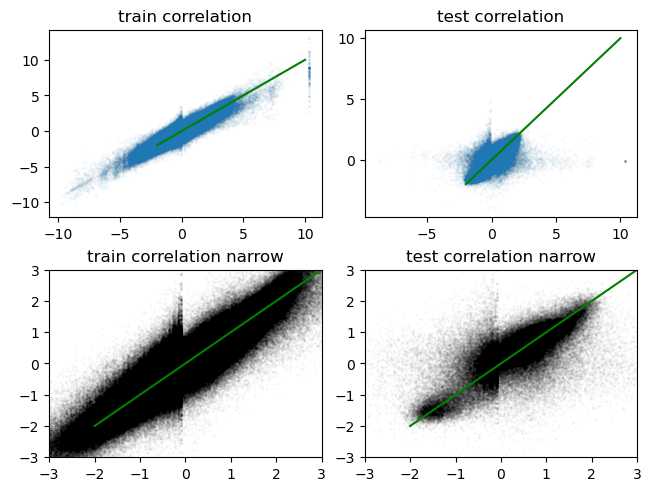

In [33]:
X_train_del2_pred35=model35.predict(X_train_del2,verbose=1)
X_test_del2_pred35=model35.predict(X_test_del2, verbose=1)
corre_plot(X_train_del2, X_train_del2_pred35, X_test_del2, X_test_del2_pred35)

In [34]:
layer_name='dense_23'
latent_layer=Model(inputs=model35.input, outputs=model35.get_layer(layer_name).output)

In [35]:
latent_layer_pred_train=latent_layer.predict(X_train_del2, verbose=1)

4/4 [==============================] - 0s 3ms/step


In [36]:
latent_layer_pred_train.shape

(102, 20)

In [37]:
latent_layer_pred_test=latent_layer.predict(X_test_del2, verbose=1)

1/1 [==============================] - 0s 16ms/step


In [38]:
latent_layer_pred_test.shape

(6, 20)

In [39]:
X_train_20dims=pd.DataFrame(latent_layer_pred_train)
X_train_20dims

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.000000,0.125750,0.255411,0.000000,0.051145,0.356682,0.000000,0.000000,0.000000,0.176874,0.000000,0.000000,0.000000,0.000000,0.059201,0.000000,0.344101
1,0.270660,0.225296,0.208373,0.168255,0.071344,0.000000,0.000000,0.000000,0.000000,0.070583,0.000000,0.000000,0.000000,0.013592,0.114966,0.008769,0.118944,0.000000,0.000000,0.000000
2,0.247635,0.000000,0.293602,0.036321,0.000000,0.000000,0.000000,0.000000,0.000000,0.190179,0.000000,0.000000,0.000000,0.334856,0.000000,0.044681,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.229711,0.000000,0.205947,0.113305,0.000000,0.000000,0.000385,0.216576,0.000000,0.002574,0.164145,0.028288,0.016280,0.000000,0.000000,0.000000,0.000000,0.022435,0.000000
4,0.000000,0.326286,0.000000,0.143129,0.223425,0.000000,0.000000,0.082847,0.484194,0.000000,0.000000,0.000000,0.024597,0.353398,0.000000,0.168815,0.000000,0.000000,0.000000,0.370749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000000,0.000000,0.055057,0.000000,0.000000,0.440385,0.148177,0.000000,0.018327,0.000000,0.000000,0.286305,0.352881,0.000000,0.241434,0.000000,0.146472,0.344996,0.137538,0.000000
98,0.000000,0.000000,0.000000,0.293161,0.000000,0.000000,0.361787,0.000000,0.000000,0.234602,0.271370,0.000000,0.000000,0.000000,0.000000,0.000000,0.472123,0.155007,0.000000,0.000000
99,0.075526,0.000000,0.450489,0.000000,0.000000,0.051074,0.118090,0.000000,0.000000,0.000000,0.057015,0.071482,0.068448,0.000000,0.360621,0.000000,0.425631,0.342732,0.275638,0.000000
100,0.000000,0.270461,0.000000,0.413110,0.000000,0.000000,0.000000,0.000062,0.228851,0.000000,0.031970,0.139236,0.000000,0.499615,0.000000,0.000000,0.000000,0.000000,0.000000,0.220597


In [40]:
X_test_20dims=pd.DataFrame(latent_layer_pred_test)
X_test_20dims

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.064989,0.000000,0.000000,0.000000,0.000000,0.000000,0.152591,0.176920,0.0,0.000000,0.000000,0.000000,0.259481,0.000000,0.202997,0.000000,0.000000,0.000000,0.317593
1,0.000000,0.291449,0.000000,0.147359,0.228751,0.000000,0.000000,0.196447,0.496537,0.0,0.001118,0.000000,0.066065,0.314282,0.000000,0.109155,0.000000,0.000000,0.000000,0.503830
2,0.000000,0.125368,0.000000,0.000000,0.101460,0.087911,0.000000,0.101431,0.344378,0.0,0.000000,0.000000,0.094336,0.180550,0.000000,0.137912,0.000000,0.000000,0.000000,0.289668
3,0.000000,0.161319,0.000000,0.206069,0.000000,0.000000,0.000000,0.251136,0.107769,0.0,0.000000,0.000000,0.000000,0.164569,0.000000,0.038272,0.000000,0.000000,0.042090,0.297800
4,0.078810,0.000000,0.251360,0.000000,0.012522,0.028067,0.016358,0.000000,0.000000,0.0,0.048941,0.021994,0.064107,0.000000,0.235343,0.000000,0.418955,0.245658,0.194366,0.000000
5,0.063133,0.201389,0.020856,0.331525,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.170047,0.000000,0.000000,0.000000,0.000000,0.000000,0.075661


In [41]:
X_train_20dims.shape

(102, 20)

In [42]:
train_patient_num.shape

(102,)

In [43]:
X_train_20dims['patient number']=train_patient_num

In [44]:
X_train_20dims

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,patient number
0,0.000000,0.000000,0.000000,0.000000,0.125750,0.255411,0.000000,0.051145,0.356682,0.000000,...,0.000000,0.176874,0.000000,0.000000,0.000000,0.000000,0.059201,0.000000,0.344101,0
1,0.270660,0.225296,0.208373,0.168255,0.071344,0.000000,0.000000,0.000000,0.000000,0.070583,...,0.000000,0.000000,0.013592,0.114966,0.008769,0.118944,0.000000,0.000000,0.000000,1
2,0.247635,0.000000,0.293602,0.036321,0.000000,0.000000,0.000000,0.000000,0.000000,0.190179,...,0.000000,0.000000,0.334856,0.000000,0.044681,0.000000,0.000000,0.000000,0.000000,2
3,0.000000,0.229711,0.000000,0.205947,0.113305,0.000000,0.000000,0.000385,0.216576,0.000000,...,0.164145,0.028288,0.016280,0.000000,0.000000,0.000000,0.000000,0.022435,0.000000,0
4,0.000000,0.326286,0.000000,0.143129,0.223425,0.000000,0.000000,0.082847,0.484194,0.000000,...,0.000000,0.024597,0.353398,0.000000,0.168815,0.000000,0.000000,0.000000,0.370749,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000000,0.000000,0.055057,0.000000,0.000000,0.440385,0.148177,0.000000,0.018327,0.000000,...,0.286305,0.352881,0.000000,0.241434,0.000000,0.146472,0.344996,0.137538,0.000000,2
98,0.000000,0.000000,0.000000,0.293161,0.000000,0.000000,0.361787,0.000000,0.000000,0.234602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.472123,0.155007,0.000000,0.000000,1
99,0.075526,0.000000,0.450489,0.000000,0.000000,0.051074,0.118090,0.000000,0.000000,0.000000,...,0.071482,0.068448,0.000000,0.360621,0.000000,0.425631,0.342732,0.275638,0.000000,0
100,0.000000,0.270461,0.000000,0.413110,0.000000,0.000000,0.000000,0.000062,0.228851,0.000000,...,0.139236,0.000000,0.499615,0.000000,0.000000,0.000000,0.000000,0.000000,0.220597,0


In [45]:
X_test_20dims['patient number']=test_patient_num

In [46]:
X_test_20dims

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,patient number
0,0.000000,0.064989,0.000000,0.000000,0.000000,0.000000,0.000000,0.152591,0.176920,0.0,...,0.000000,0.000000,0.259481,0.000000,0.202997,0.000000,0.000000,0.000000,0.317593,1
1,0.000000,0.291449,0.000000,0.147359,0.228751,0.000000,0.000000,0.196447,0.496537,0.0,...,0.000000,0.066065,0.314282,0.000000,0.109155,0.000000,0.000000,0.000000,0.503830,1
2,0.000000,0.125368,0.000000,0.000000,0.101460,0.087911,0.000000,0.101431,0.344378,0.0,...,0.000000,0.094336,0.180550,0.000000,0.137912,0.000000,0.000000,0.000000,0.289668,2
3,0.000000,0.161319,0.000000,0.206069,0.000000,0.000000,0.000000,0.251136,0.107769,0.0,...,0.000000,0.000000,0.164569,0.000000,0.038272,0.000000,0.000000,0.042090,0.297800,0
4,0.078810,0.000000,0.251360,0.000000,0.012522,0.028067,0.016358,0.000000,0.000000,0.0,...,0.021994,0.064107,0.000000,0.235343,0.000000,0.418955,0.245658,0.194366,0.000000,0
5,0.063133,0.201389,0.020856,0.331525,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.170047,0.000000,0.000000,0.000000,0.000000,0.000000,0.075661,0


In [47]:
df_20dims=pd.concat([X_train_20dims, X_test_20dims], axis=0, ignore_index=True)
df_20dims

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,patient number
0,0.000000,0.000000,0.000000,0.000000,0.125750,0.255411,0.000000,0.051145,0.356682,0.000000,...,0.000000,0.176874,0.000000,0.000000,0.000000,0.000000,0.059201,0.000000,0.344101,0
1,0.270660,0.225296,0.208373,0.168255,0.071344,0.000000,0.000000,0.000000,0.000000,0.070583,...,0.000000,0.000000,0.013592,0.114966,0.008769,0.118944,0.000000,0.000000,0.000000,1
2,0.247635,0.000000,0.293602,0.036321,0.000000,0.000000,0.000000,0.000000,0.000000,0.190179,...,0.000000,0.000000,0.334856,0.000000,0.044681,0.000000,0.000000,0.000000,0.000000,2
3,0.000000,0.229711,0.000000,0.205947,0.113305,0.000000,0.000000,0.000385,0.216576,0.000000,...,0.164145,0.028288,0.016280,0.000000,0.000000,0.000000,0.000000,0.022435,0.000000,0
4,0.000000,0.326286,0.000000,0.143129,0.223425,0.000000,0.000000,0.082847,0.484194,0.000000,...,0.000000,0.024597,0.353398,0.000000,0.168815,0.000000,0.000000,0.000000,0.370749,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.000000,0.291449,0.000000,0.147359,0.228751,0.000000,0.000000,0.196447,0.496537,0.000000,...,0.000000,0.066065,0.314282,0.000000,0.109155,0.000000,0.000000,0.000000,0.503830,1
104,0.000000,0.125368,0.000000,0.000000,0.101460,0.087911,0.000000,0.101431,0.344378,0.000000,...,0.000000,0.094336,0.180550,0.000000,0.137912,0.000000,0.000000,0.000000,0.289668,2
105,0.000000,0.161319,0.000000,0.206069,0.000000,0.000000,0.000000,0.251136,0.107769,0.000000,...,0.000000,0.000000,0.164569,0.000000,0.038272,0.000000,0.000000,0.042090,0.297800,0
106,0.078810,0.000000,0.251360,0.000000,0.012522,0.028067,0.016358,0.000000,0.000000,0.000000,...,0.021994,0.064107,0.000000,0.235343,0.000000,0.418955,0.245658,0.194366,0.000000,0


In [86]:
df_20dims.columns=['column 0','column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','patient number']

In [87]:
df_20dims

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,...,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,patient number
0,0.000000,0.000000,0.000000,0.000000,0.125750,0.255411,0.000000,0.051145,0.356682,0.000000,...,0.000000,0.176874,0.000000,0.000000,0.000000,0.000000,0.059201,0.000000,0.344101,0
1,0.270660,0.225296,0.208373,0.168255,0.071344,0.000000,0.000000,0.000000,0.000000,0.070583,...,0.000000,0.000000,0.013592,0.114966,0.008769,0.118944,0.000000,0.000000,0.000000,1
2,0.247635,0.000000,0.293602,0.036321,0.000000,0.000000,0.000000,0.000000,0.000000,0.190179,...,0.000000,0.000000,0.334856,0.000000,0.044681,0.000000,0.000000,0.000000,0.000000,2
3,0.000000,0.229711,0.000000,0.205947,0.113305,0.000000,0.000000,0.000385,0.216576,0.000000,...,0.164145,0.028288,0.016280,0.000000,0.000000,0.000000,0.000000,0.022435,0.000000,0
4,0.000000,0.326286,0.000000,0.143129,0.223425,0.000000,0.000000,0.082847,0.484194,0.000000,...,0.000000,0.024597,0.353398,0.000000,0.168815,0.000000,0.000000,0.000000,0.370749,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.000000,0.291449,0.000000,0.147359,0.228751,0.000000,0.000000,0.196447,0.496537,0.000000,...,0.000000,0.066065,0.314282,0.000000,0.109155,0.000000,0.000000,0.000000,0.503830,1
104,0.000000,0.125368,0.000000,0.000000,0.101460,0.087911,0.000000,0.101431,0.344378,0.000000,...,0.000000,0.094336,0.180550,0.000000,0.137912,0.000000,0.000000,0.000000,0.289668,2
105,0.000000,0.161319,0.000000,0.206069,0.000000,0.000000,0.000000,0.251136,0.107769,0.000000,...,0.000000,0.000000,0.164569,0.000000,0.038272,0.000000,0.000000,0.042090,0.297800,0
106,0.078810,0.000000,0.251360,0.000000,0.012522,0.028067,0.016358,0.000000,0.000000,0.000000,...,0.021994,0.064107,0.000000,0.235343,0.000000,0.418955,0.245658,0.194366,0.000000,0


In [88]:
df_20dims_feature=df_20dims.drop('patient number', axis=1).columns
df_20dims_feature

Index(['column 0', 'column 1', 'column 2', 'column 3', 'column 4', 'column 5',
       'column 6', 'column 7', 'column 8', 'column 9', 'column 10',
       'column 11', 'column 12', 'column 13', 'column 14', 'column 15',
       'column 16', 'column 17', 'column 18', 'column 19'],
      dtype='object')

In [48]:
X_lgb=df_20dims.drop('patient number', axis=1).values
y_lgb=df_20dims['patient number'].values

In [96]:
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb=train_test_split(X_lgb, y_lgb, test_size=0.2, random_state=2022, stratify=y_lgb)

In [97]:
y_test_lgb

array([1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0])

In [50]:
#importing library
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [66]:
model1=lgb.LGBMClassifier()
model1.fit(X_train_lgb, y_train_lgb)

y_pred_lgb=model1.predict(X_test_lgb)

y_pred_prob_lgb=model1.predict_proba(X_test_lgb)

In [67]:
df_pred_lgb =pd.DataFrame({'patient number':y_test_lgb, 'patient number_pred':y_pred_lgb})
display(df_pred_lgb)
df_pred_prob_lgb = pd.DataFrame({'y_test':y_test_lgb, 'patient0_prob':y_pred_prob_lgb[:,0], 'patient1_prob':y_pred_prob_lgb[:,1], 'patient2_prob':y_pred_prob_lgb[:,2]})
display(df_pred_prob_lgb)

,patient number,patient number_pred
0,1,1
1,1,1
2,1,0
3,0,0
4,2,2


,y_test,patient0_prob,patient1_prob,patient2_prob
0,1,0.373577,0.575108,0.051314
1,1,0.262448,0.691011,0.046541
2,1,0.541754,0.024266,0.433981
3,0,0.932734,0.064412,0.002855
4,2,0.083672,0.169633,0.746696


In [98]:
print(df_pred_lgb)

    patient number  patient number_pred
0                1                    1
1                1                    1
2                1                    0
3                0                    0
4                2                    2
5                1                    1
6                0                    1
7                1                    2
8                0                    1
9                2                    0
10               2                    2
11               0                    0
12               0                    0
13               0                    0
14               2                    1
15               2                    2
16               2                    2
17               0                    0
18               1                    0
19               0                    1
20               0                    0
21               0                    0


In [68]:
#model evaluation
acc_lgb = accuracy_score(y_test_lgb, y_pred_lgb)
print(acc_lgb)

0.6363636363636364


In [89]:
importance=pd.DataFrame(model1.feature_importances_, index=df_20dims_feature, columns=['importance'])
display(importance)

,importance
column 0,26
column 1,24
column 2,37
column 3,34
column 4,12


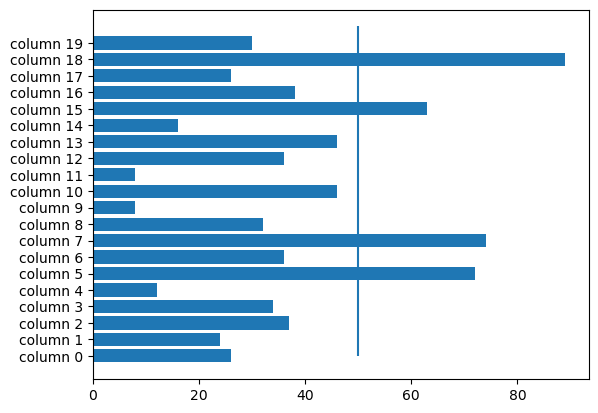

In [170]:
X_lgb_df=df_20dims.drop('patient number', axis=1)
plt.barh(X_lgb_df.columns, model1.feature_importances_)
plt.vlines(50,0,20)

In [54]:
!conda install graphviz

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


<AxesSubplot:>

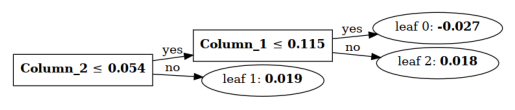

In [213]:
from sklearn.tree import plot_tree
lgb.plot_tree(model1, tree_index=299)

In [231]:
#python API
lgb_train = lgb.Dataset(X_train_lgb, y_train_lgb)
lgb_eval = lgb.Dataset(X_test_lgb, y_test_lgb, reference=lgb_train)

params={
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass', 
    'num_class': 3,
    'metric': {'multi_logloss'},
    'num_leaves': 50,
    'verbose':1,
}

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 20
[LightGBM] [Info] Start training from score -0.765468
[LightGBM] [Info] Start training from score -1.318853
[LightGBM] [Info] Start training from score -1.318853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's multi_logloss: 1.02465	valid's multi_logloss: 1.05645
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

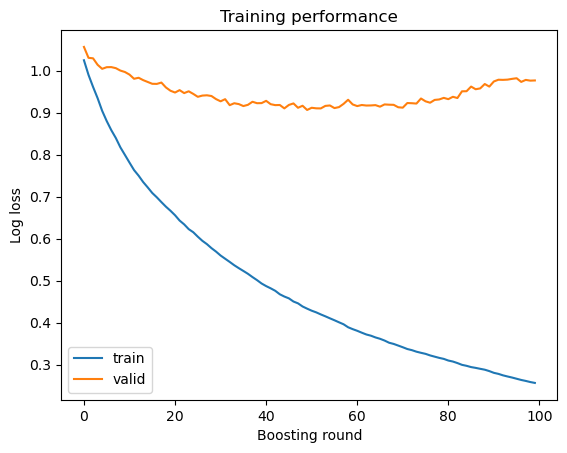

In [232]:
evaluation_results={}
model = lgb.train(params,
                  train_set=lgb_train,
                  valid_names=['train', 'valid'],
                  valid_sets=[lgb_train, lgb_eval],
                  evals_result=evaluation_results,
                  early_stopping_rounds=100)

plt.plot(evaluation_results['train']['multi_logloss'], label='train')
plt.plot(evaluation_results['valid']['multi_logloss'], label='valid')
plt.ylabel('Log loss')
plt.xlabel('Boosting round')
plt.title('Training performance')
plt.legend()
plt.show()

In [233]:
y_pred_prob_lgb_api = model.predict(X_test_lgb)
y_pred_lgb_api=np.argmax(y_pred_prob_lgb_api,axis=1)

In [234]:
acc_lgb = accuracy_score(y_test_lgb, y_pred_lgb_api)
print(acc_lgb)

0.6363636363636364


In [235]:
y_pred_lgb_api_train=model.predict(X_train_lgb)
y_pred_lgb_api_train

array([[7.55111969e-01, 1.84195174e-01, 6.06928575e-02],
       [1.27095492e-01, 1.87512256e-02, 8.54153282e-01],
       [9.24196367e-01, 5.30062250e-02, 2.27974083e-02],
       [1.09069032e-01, 8.81276631e-01, 9.65433684e-03],
       [8.92876359e-01, 8.54017150e-02, 2.17219259e-02],
       [9.53917485e-01, 3.81649264e-02, 7.91758887e-03],
       [3.39896921e-01, 6.08132605e-01, 5.19704737e-02],
       [7.22524094e-01, 1.55239753e-01, 1.22236154e-01],
       [9.30785544e-01, 1.56419180e-02, 5.35725383e-02],
       [5.64811028e-02, 7.74750022e-01, 1.68768875e-01],
       [2.10365140e-01, 7.07019294e-01, 8.26155661e-02],
       [9.56607016e-01, 2.61344738e-02, 1.72585103e-02],
       [9.69035660e-01, 3.02604061e-02, 7.03933535e-04],
       [8.66626093e-01, 6.79423475e-02, 6.54315594e-02],
       [5.09788678e-02, 4.26991627e-02, 9.06321969e-01],
       [3.65751463e-01, 2.13322737e-01, 4.20925800e-01],
       [6.52623355e-01, 1.59961525e-01, 1.87415121e-01],
       [9.82236450e-01, 1.32308

In [303]:
y_pred_lgb_api_train.shape

(86, 3)

In [236]:
#accuracy of train data
y_pred_lgb_api_train=model.predict(X_train_lgb)
y_pred_train = np.argmax(y_pred_lgb_api_train, axis=1)
# _, y_test_acc_train = np.where(y_train_lgb > 0)
accuracy_train_lgb = accuracy_score(y_train_lgb, y_pred_train)
print(accuracy_train_lgb)

0.9767441860465116


In [237]:
y_pred_lgb_api_train=model.predict(X_train_lgb)
y_pred_train = np.argmax(y_pred_lgb_api_train, axis=1)
y_pred_train

array([0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2])

In [238]:
df_pred = pd.DataFrame({'patient number':y_test_lgb,'patient_number_pred':y_pred_lgb_api})
print(df_pred)
df_pred_prob = pd.DataFrame({'y':y_test_lgb, 'patient0_prob':y_pred_prob_lgb_api[:,0], 'patient1_prob':y_pred_prob_lgb_api[:,1], 'patient2_prob':y_pred_prob_lgb_api[:,2]})
print(df_pred_prob)

    patient number  patient_number_pred
0                1                    1
1                1                    1
2                1                    0
3                0                    0
4                2                    2
5                1                    1
6                0                    1
7                1                    2
8                0                    1
9                2                    0
10               2                    2
11               0                    0
12               0                    0
13               0                    0
14               2                    1
15               2                    2
16               2                    2
17               0                    0
18               1                    0
19               0                    1
20               0                    0
21               0                    0
    y  patient0_prob  patient1_prob  patient2_prob
0   1       0.373577       0.

In [161]:
print(df_pred)

    patient number  patient_number_pred
0                1                    1
1                1                    1
2                1                    2
3                0                    0
4                2                    2
5                1                    1
6                0                    1
7                1                    2
8                0                    1
9                2                    0
10               2                    2
11               0                    0
12               0                    0
13               0                    0
14               2                    1
15               2                    2
16               2                    0
17               0                    0
18               1                    0
19               0                    1
20               0                    0
21               0                    0


In [239]:
importance=pd.DataFrame(model.feature_importance(), index=df_20dims_feature, columns=['importance'])
display(importance)

,importance
column 0,26
column 1,24
column 2,37
column 3,34
column 4,12


In [61]:
!pip install graphviz

In [240]:
X_test_lgb_df=pd.DataFrame(X_test_lgb)
X_test_lgb_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.059353,0.105384,0.069013,0.000000,0.000000,0.000000,0.183707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096849,0.059969,0.000000,0.000000
1,0.019282,0.000000,0.240433,0.061473,0.000000,0.000000,0.013284,0.000000,0.000000,0.000000,0.003530,0.084836,0.000000,0.000000,0.189617,0.000000,0.213126,0.175454,0.158959,0.000000
2,0.270660,0.225296,0.208373,0.168255,0.071344,0.000000,0.000000,0.000000,0.000000,0.070583,0.000000,0.000000,0.000000,0.013592,0.114966,0.008769,0.118944,0.000000,0.000000,0.000000
3,0.000000,0.161319,0.000000,0.206069,0.000000,0.000000,0.000000,0.251136,0.107769,0.000000,0.000000,0.000000,0.000000,0.164569,0.000000,0.038272,0.000000,0.000000,0.042090,0.297800
4,0.065717,0.000000,0.000000,0.000000,0.188407,0.000000,0.000000,0.029509,0.010337,0.000000,0.000000,0.000000,0.141926,0.000000,0.000000,0.104926,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.245709,0.000000,0.000000,0.098957,0.420778,0.000000,0.000000,0.133523,0.017956,0.222335,0.023633,0.000000,0.336971,0.000000,0.461744,0.352898,0.000000,0.000000
6,0.009526,0.411784,0.128003,0.328881,0.000000,0.000000,0.000000,0.298633,0.074528,0.000000,0.000000,0.000000,0.000000,0.374809,0.000000,0.112566,0.000000,0.000000,0.025370,0.244842
7,0.000000,0.000000,0.264812,0.000000,0.000000,0.019756,0.302103,0.000000,0.000000,0.000000,0.073259,0.000000,0.000000,0.000000,0.010249,0.000000,0.084256,0.290551,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.156406,0.485438,0.203203,0.000000,0.000000,0.000000,0.000000,0.000000,0.052162,0.000000,0.353427,0.000000,0.355789,0.478944,0.133090,0.000000
9,0.040165,0.000000,0.000000,0.000000,0.214195,0.275424,0.004571,0.000000,0.000000,0.000000,0.000000,0.000000,0.256515,0.000000,0.271461,0.000000,0.428415,0.225195,0.299344,0.000000


In [302]:
print(lgb_eval.get_label())

[1. 1. 1. 0. 2. 1. 0. 1. 0. 2. 2. 0. 0. 0. 2. 2. 2. 0. 1. 0. 0. 0.]


In [306]:
c=lgb_eval.get_label()
c[0]

1.0

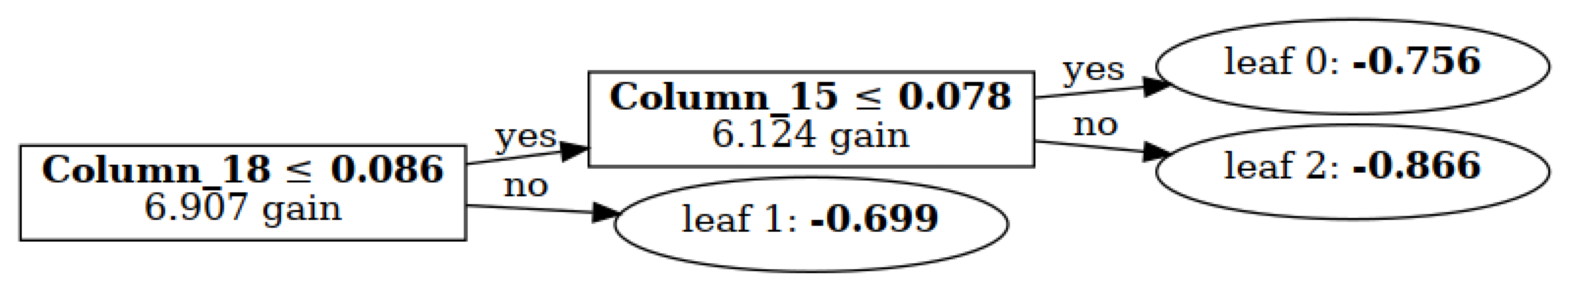

'Tree.gv.png'

In [241]:
ax = lgb.plot_tree(model, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=0, format='png', name='Tree')
graph.render(view=True)

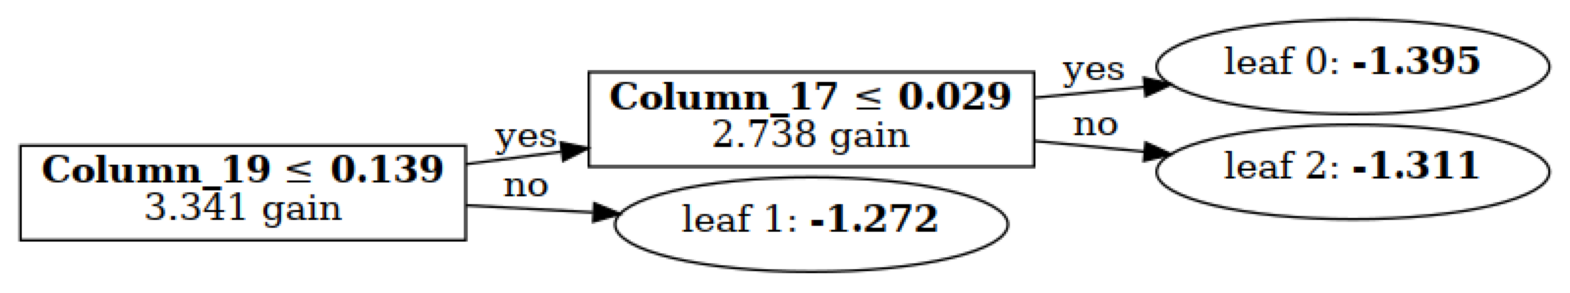

'Tree.gv.png'

In [242]:
ax = lgb.plot_tree(model, tree_index=1, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=1, format='png', name='Tree')
graph.render(view=True)

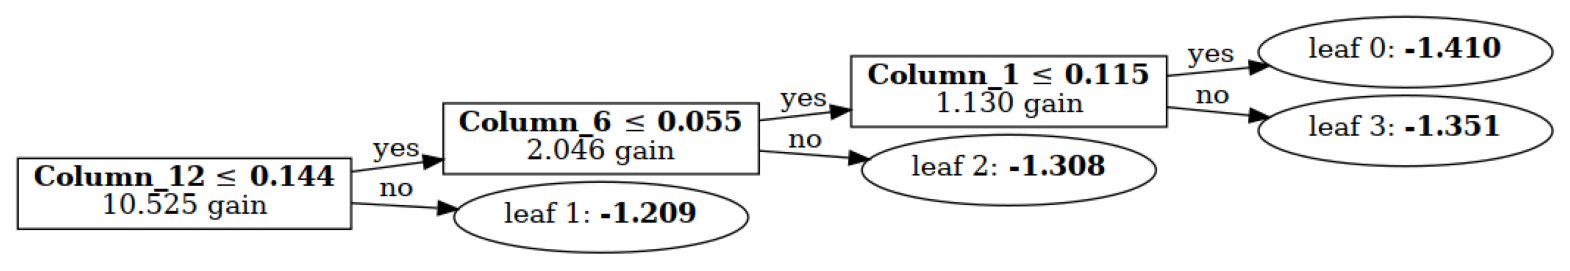

'Tree.gv.png'

In [243]:
ax = lgb.plot_tree(model, tree_index=2, figsize=(20, 20), show_info=['split_gain'])
plt.show()
graph = lgb.create_tree_digraph(model, tree_index=2, format='png', name='Tree')
graph.render(view=True)

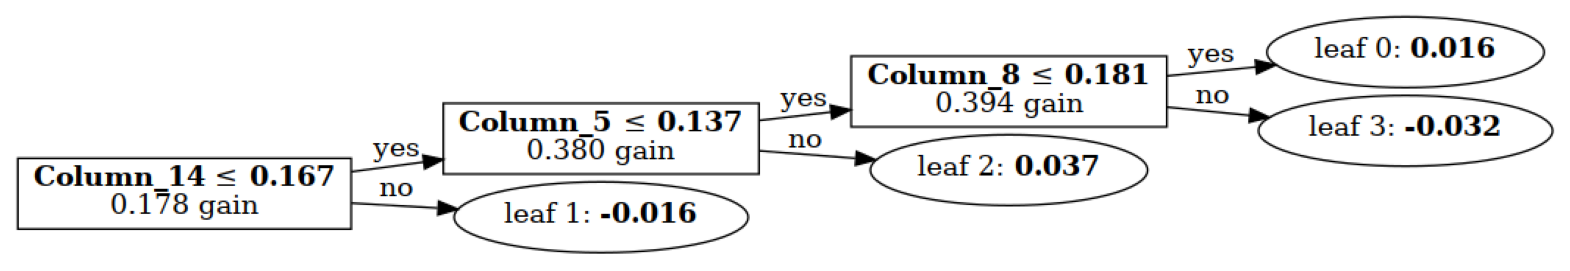

In [265]:
ax = lgb.plot_tree(model, tree_index=297, figsize=(20, 20), show_info=['split_gain'])
plt.show()

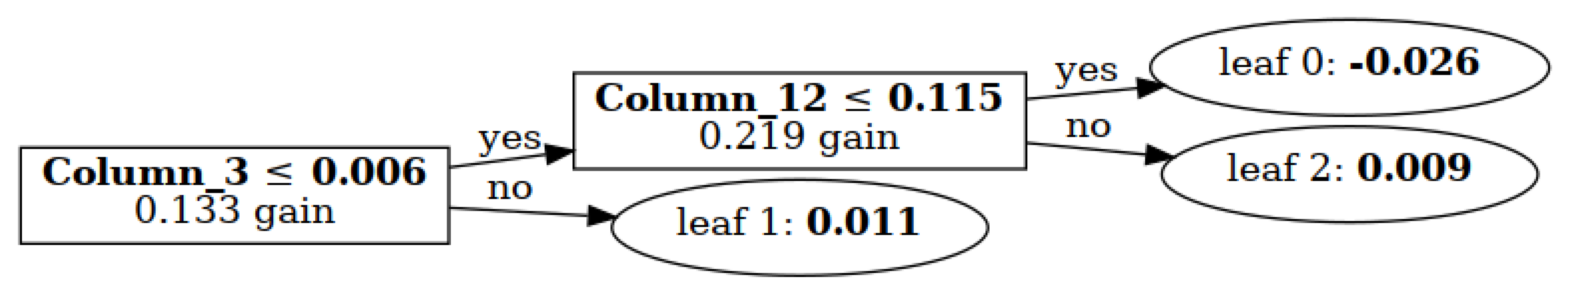

In [266]:
ax = lgb.plot_tree(model, tree_index=298, figsize=(20, 20), show_info=['split_gain'])
plt.show()

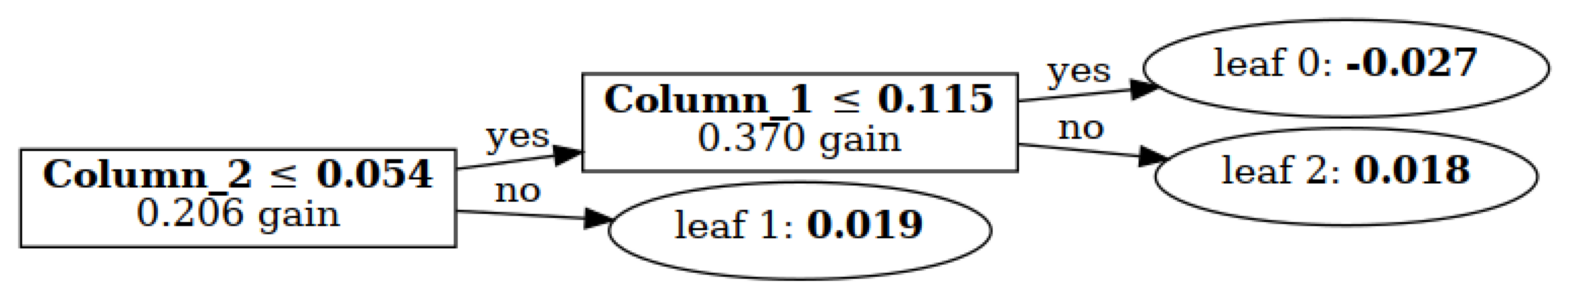

In [246]:
ax = lgb.plot_tree(model, tree_index=299, figsize=(20, 20), show_info=['split_gain'])
plt.show()

In [247]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

In [273]:
def sigmoid(x):
    return 1 / (1+np.sum(np.exp(x)))

In [276]:
softmax([-0.721, -1.302,-1.302])

array([0.47199255, 0.26400372, 0.26400372])

In [261]:
a=np.array([[-0.756, -1.311, -1.410],[0,1,1]])

In [262]:
a.shape

(2, 3)

In [144]:
number_array=df_20dims['patient number'].values
number_array

array([0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 0,
       1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2,
       0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0])

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_true, y_prob)

In [250]:
import math

In [287]:
import numpy as np
from sklearn.metrics import make_scorer
@make_scorer
def multiclass_log_loss(y_pred, data, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss
    idea from this post:
    http://www.kaggle.com/c/emc-data-science/forums/t/2149/is-anyone-noticing-difference-betwen-validation-and-leaderboard-error/12209#post12209
    Parameters
    ----------
    y_true : array, shape = [n_samples]
    y_pred : array, shape = [n_samples, n_classes]
    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)
    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]
    actual = np.zeros(y_pred.shape)
    rows = actual.shape[0]
    actual[np.arange(rows), data.astype(int)] = 1
    vsota = np.sum(actual * np.log(predictions))
    
   # For GridSearchCV, need neg value.
    return -1.0 / rows * vsota
    # return -1.0 / rows * vsota

In [296]:
#original metric
def multi_log_loss_original(preds, data, eps=1e-15):
    #get label np ndarray
    y_true=data.get_label()
    y_pred=preds.reshape((y_true.size,-1), order='F')
    
    
    
    # # N_LABELS=3
    # # reshaped_preds=preds.reshape(N_LABELS, len(preds) // N_LABELS)
    # predictions=np.clip(preds, eps, 1-eps)
    # predictions /= predictions.sum[:, np.newaxis]
    # actual = np.zeros(reshaped_preds.shape)
    # rows = actual.shape[0]
    # actual[np.arange(rows), y_true.astype(int)] = 1
    # culc=np.sum(actual*np.log(predictions))
    # return -1.0 / rows*culc
    

In [316]:
preds=[[0.2,0.3,0.5],[0.1,0.3,0.6],[0.1,0.2,0.7]]
data=[0,1,2]
data1=[5,4,3]
data2=[9,1,0]


250

In [314]:
from typing import Optional, List, Tuple

#multiclass_log_loss for LGBM
class MultiLoglossForLGBM:

    
    def __init__(self, n_class: int=3, use_softmax: bool=True, epsilon: float=1e-32) -> None:
        #inuitialize        
        self.name = "my_multiclass_logloss"
        self.n_class = n_class
        self.prob_func = self._get_prob_value if use_softmax else lambda x: x
        self.epsilon = epsilon
    
    def __call__(self, preds: np.ndarray, labels: np.ndarray, weight: Optional[np.ndarray]=None) -> float:
        #calculate loss function
        #get prob value by softmax
        prob = self.prob_func(preds)           # <= from logits to probability
        #convert labels to 1-hot
        labels = self._get_1hot_label(labels)  # <= labels (1D-array) to 1hot
        
        # for i in range(n_example):
        #     if np.argmax(labels[i,:])==0:
        #         #some calculation
        #     if np.argmax(labels[i,:])==1:
        #         #b=np.sum(-np.log)
        loss_by_sample = np.sum(- np.log(prob) * labels, axis=1)
        loss = np.average(loss_by_sample, weight)
        
        return loss
    
    def _calc_grad_and_hess(
        self, preds: np.ndarray, labels: np.ndarray, weight: Optional[np.ndarray]=None
    ) -> Tuple[np.ndarray]:
        """Calc Grad and Hess"""
        # # get prob value by softmax
        prob = self.prob_func(preds)           # <= margin を確率値に直す
        # # convert labels to 1-hot
        labels = self._get_1hot_label(labels)  # <= labels (1D-array) を 1hot に変換

        grad = prob - labels
        hess = prob * (1 - prob)        
        if weight is not None:
            grad = grad * weight[:, None]
            hess = hess * weight[:, None]
        return grad, hess
    
    def return_loss(self, preds: np.ndarray, data: lgb.Dataset) -> Tuple[str, float, bool]:
        """Return Loss for lightgbm"""
        labels = data.get_label()
        weight = data.get_weight()
        n_example = len(labels)
        
        # # reshape preds: (n_class * n_example,) => (n_class, n_example) =>  (n_example, n_class)
        preds = preds.reshape(self.n_class, n_example).T  # <= preds (1D-array) を 2D-array に直す
        # # calc loss
        loss = self(preds, labels, weight)
        
        return self.name, loss, False
    
    def return_grad_and_hess(self, preds: np.ndarray, data: lgb.Dataset) -> Tuple[np.ndarray]:
        """Return Grad and Hess for lightgbm"""
        labels = data.get_label()
        weight = data.get_weight()
        n_example = len(labels)
        
        # # reshape preds: (n_class * n_example,) => (n_class, n_example) =>  (n_example, n_class)
        preds = preds.reshape(self.n_class, n_example).T  # <= preds (1D-array) を 2D-array に直す
        # # calc grad and hess.
        grad, hess =  self._calc_grad_and_hess(preds, labels, weight)

        # # reshape grad, hess: (n_example, n_class) => (n_class, n_example) => (n_class * n_example,) 
        grad = grad.T.reshape(n_example * self.n_class)   # <= 1D-array に戻す
        hess = hess.T.reshape(n_example * self.n_class)   # <= 1D-array に戻す
        
        return grad, hess
    
    def _get_prob_value(self, preds: np.ndarray) -> np.ndarray:
        """Convert Margin(Logit) to Prob by Softmax."""
        prob = np.exp(preds - preds.max(axis=1)[:, None])
        prob = prob / prob.sum(axis=1)[:, None]
        prob = np.clip(prob, self.epsilon, 1 - self.epsilon)
        
        return prob
    
    def _get_1hot_label(self, labels: np.ndarray) -> np.ndarray:
        """Convert labels to 1hot array."""
        n_example = len(labels)
        #make a matrix here?
        
        one_hot = np.zeros((n_example, self.n_class), dtype=int)
        one_hot[np.arange(n_example), labels.astype(int)] = 1
        
        return one_hot

In [278]:
#original metric
lgb_train = lgb.Dataset(X_train_lgb, y_train_lgb)
lgb_eval = lgb.Dataset(X_test_lgb, y_test_lgb, reference=lgb_train)

params={
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass', 
    'num_class': 3,
    'metric': 'None',
    'num_leaves': 50,
    'verbose':1,
}

In [297]:
evaluation_results2={}
boosting = lgb.train(params,
                     train_set=lgb_train,
                     valid_names=['train', 'valid'],
                     valid_sets=[lgb_train, lgb_eval],
                     evals_result=evaluation_results2,
                     early_stopping_rounds=100,
                     fobj=None,
                     feval=multi_log_loss_original)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 20
[LightGBM] [Info] Start training from score -0.765468
[LightGBM] [Info] Start training from score -1.318853
[LightGBM] [Info] Start training from score -1.318853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


TypeError: 'builtin_function_or_method' object is not subscriptable

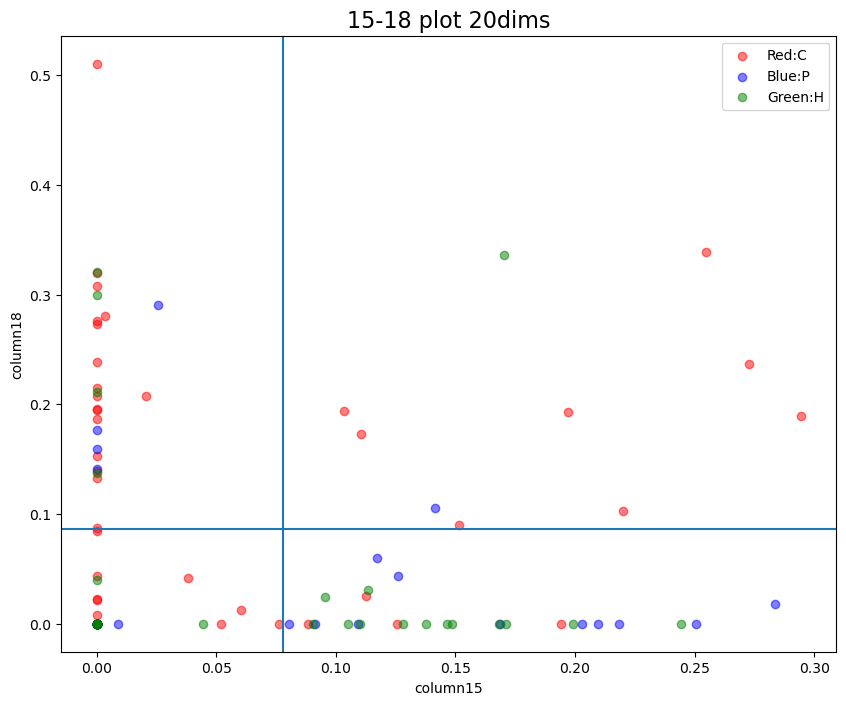

In [164]:
#check 15 and 18 column
#origin data mapping C,P,H
#column15 and 18 dims plot all
colors = ['red', 'blue', 'green']
n_clusters=3

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111)

for i in range(n_clusters):
    ax.scatter(df_20dims.iloc[:, 15][number_array==i], df_20dims.iloc[:, 18][number_array==i], color=colors[i], alpha=0.5)
ax.axhline(0.086)
ax.axvline(0.078)
ax.set_title('15-18 plot 20dims', size=16)
ax.set_xlabel('column15')
ax.set_ylabel('column18')
plt.legend(['Red:C', 'Blue:P', 'Green:H'],loc='upper right')
plt.show()

In [148]:
fig.savefig('15-18_column_plot_20dims.png')

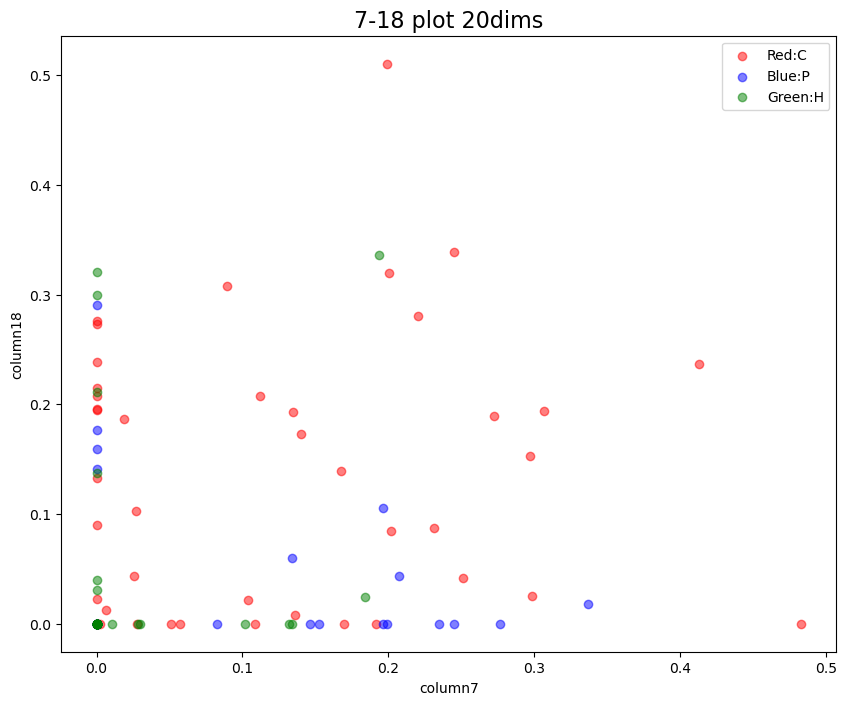

In [151]:
#check 7 and 18 column
#origin data mapping C,P,H
#column15 and 18 dims plot all
colors = ['red', 'blue', 'green']
n_clusters=3

fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111)

for i in range(n_clusters):
    ax.scatter(df_20dims.iloc[:, 7][number_array==i], df_20dims.iloc[:, 18][number_array==i], color=colors[i], alpha=0.5)
ax.set_title('7-18 plot 20dims', size=16)
ax.set_xlabel('column7')
ax.set_ylabel('column18')
plt.legend(['Red:C', 'Blue:P', 'Green:H'],loc='upper right')
plt.show()

In [127]:
#Multi Classifying with Neural Network
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam, Adamax
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import BatchNormalization

In [91]:
X=df_20dims.drop('patient number', axis=1).values
y=df_20dims['patient number'].values

In [105]:
y_T=np_utils.to_categorical(y)
y_T

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [107]:
X_train, X_test, y_train, y_test=train_test_split(X, y_T, test_size=0.2, random_state=2022, stratify=y)

In [108]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    random_state=2022,
                                                    stratify=y_train)

In [109]:
X_train.shape

(68, 20)

In [110]:
X_test.shape

(22, 20)

In [111]:
X_eval.shape

(18, 20)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_31 (Dense)             (None, 20)                2020      
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 63        
Total params: 4,183
Trainable params: 4,183
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 1s 84ms/step - loss: 1.1089 - categorical_accuracy: 0.2123 - val_loss: 1.0972 - val_categorical_accuracy: 0.5000
Epoch 2/500
3/3 [==============================] - 0s 19ms/step - loss: 1.0834 - cate

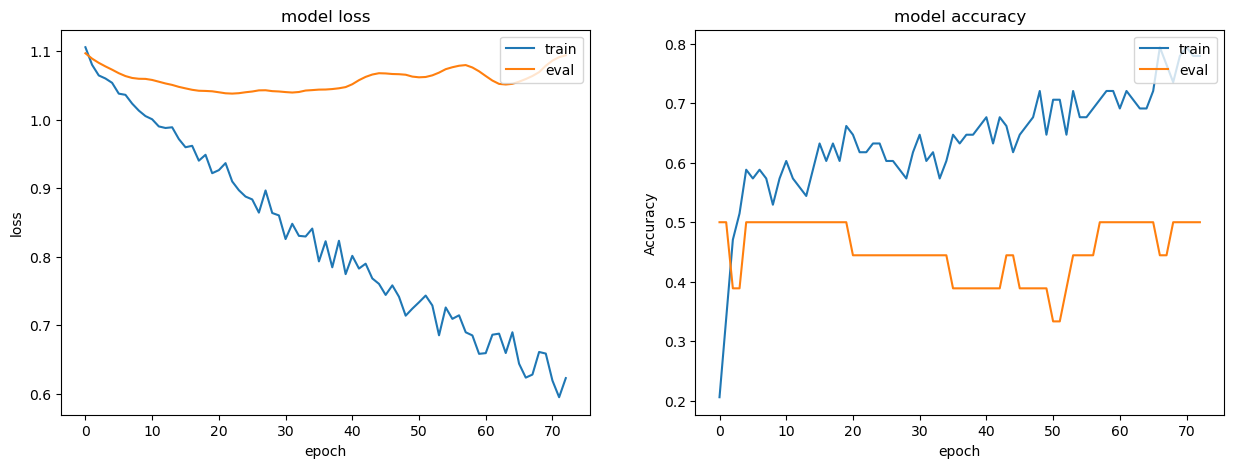

In [125]:
#modeling
model2=Sequential()
model2.add(Dense(units=100, activation='linear', input_dim=20))
model2.add(Dense(units=20, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=3, activation='softmax'))
model2.summary()

model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['categorical_accuracy'])

early_stopping=EarlyStopping(patience=50, verbose=0)

history=model2.fit(X_train, y_train,
                  epochs=500,
                  batch_size=32,
                  verbose=1,
                  validation_data=(X_eval, y_eval),
                  callbacks=[early_stopping])

history_plot(history)

In [141]:
y_pred2=model2.predict(X_test)
y_pred_max2 = np.argmax(y_pred2, axis=1)
_, y_test_acc = np.where(y_test > 0)
accuracy2 = accuracy_score(y_test_acc, y_pred_max2)
print('Neural Network:', accuracy2)

Neural Network: 0.5


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 100)               2100      
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_38 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_4 (Batch (None, 50)                200       
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                510       
_________________________________________________________________
batch_normalization_5 (Batch (None, 10)              

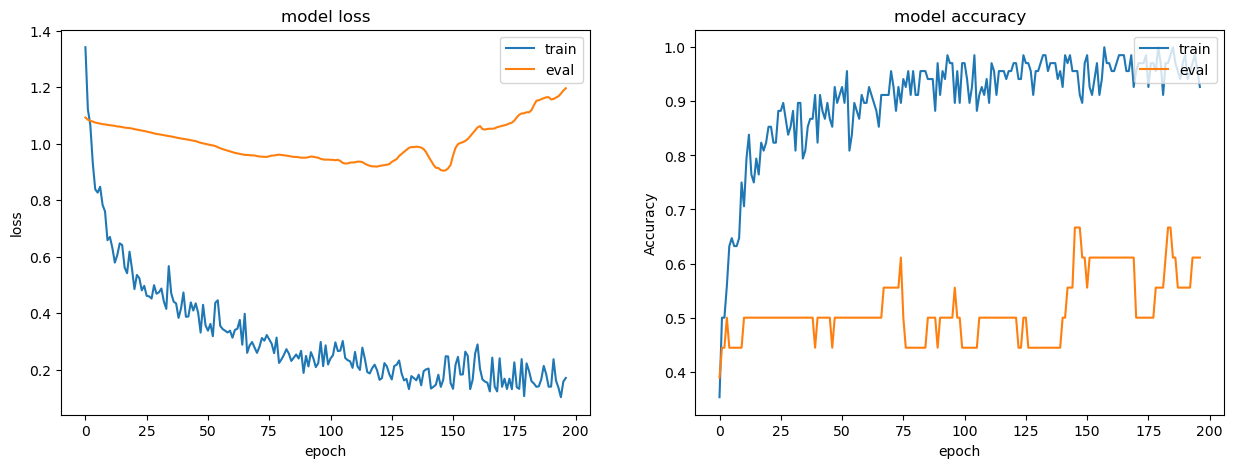

In [131]:
#modeling
model3=Sequential()
model3.add(Dense(units=100, activation='relu', input_dim=20))
model3.add(BatchNormalization())
model3.add(Dense(units=50, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(units=10, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=3, activation='softmax'))
model3.summary()

model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['categorical_accuracy'])

early_stopping=EarlyStopping(patience=50, verbose=0)

history3=model3.fit(X_train, y_train,
                  epochs=500,
                  batch_size=32,
                  verbose=1,
                  validation_data=(X_eval, y_eval),
                  callbacks=[early_stopping])

history_plot(history3)

In [140]:
y_pred3=model3.predict(X_test)
y_pred_max3 = np.argmax(y_pred3, axis=1)
_, y_test_acc = np.where(y_test > 0)
accuracy3 = accuracy_score(y_test_acc, y_pred_max3)
print('Neural Network:', accuracy3)

Neural Network: 0.5454545454545454


In [136]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [138]:
y_pred3

array([[0.08616847, 0.8992343 , 0.01459722],
       [0.6064895 , 0.35772234, 0.03578822],
       [0.8760221 , 0.10094711, 0.02303077],
       [0.49950275, 0.45103395, 0.04946329],
       [0.0303443 , 0.8034347 , 0.16622096],
       [0.06183594, 0.15339181, 0.7847723 ],
       [0.45035264, 0.4832339 , 0.06641346],
       [0.5196491 , 0.1178463 , 0.36250466],
       [0.80920535, 0.17600425, 0.01479039],
       [0.94387907, 0.04985674, 0.00626421],
       [0.7873485 , 0.09520131, 0.11745022],
       [0.70789486, 0.07380448, 0.21830063],
       [0.78689784, 0.16671886, 0.04638324],
       [0.9575639 , 0.02485037, 0.01758584],
       [0.0246044 , 0.8671216 , 0.10827399],
       [0.06544338, 0.08919122, 0.8453654 ],
       [0.22122143, 0.08108786, 0.6976907 ],
       [0.9264385 , 0.00997646, 0.06358498],
       [0.9200982 , 0.04481825, 0.03508344],
       [0.7102167 , 0.09425282, 0.19553044],
       [0.93402743, 0.02741399, 0.03855854],
       [0.96634656, 0.0223568 , 0.01129659]], dtype=flo

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 100)               2100      
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 20)                2020      
_________________________________________________________________
batch_normalization_7 (Batch (None, 20)                80        
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 3)               

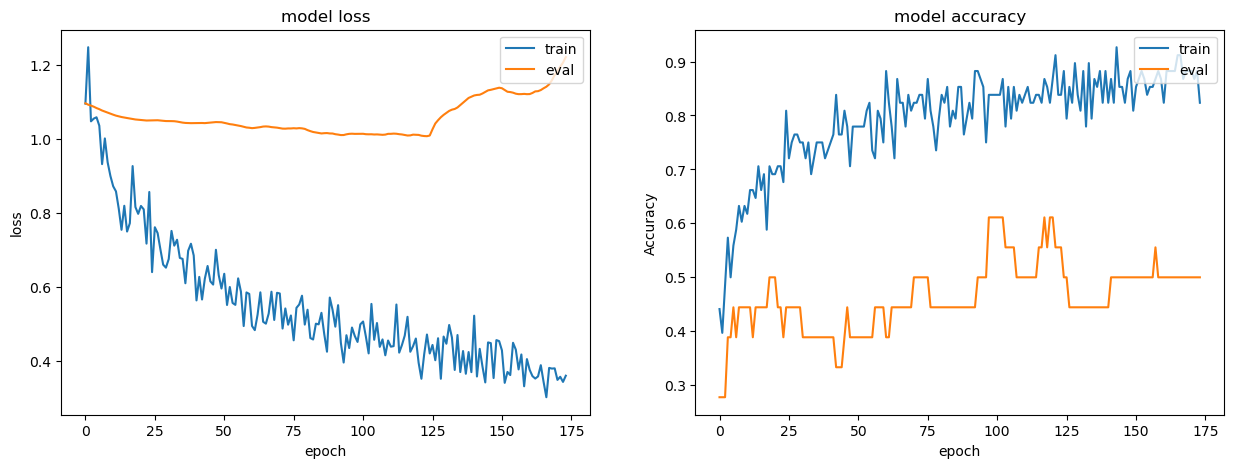

In [142]:
#modeling
model4=Sequential()
model4.add(Dense(units=100, activation='linear', input_dim=20))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(units=20, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(units=3, activation='softmax'))
model4.summary()

model4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['categorical_accuracy'])

early_stopping=EarlyStopping(patience=50, verbose=0)

history4=model4.fit(X_train, y_train,
                  epochs=500,
                  batch_size=32,
                  verbose=1,
                  validation_data=(X_eval, y_eval),
                  callbacks=[early_stopping])

history_plot(history4)

In [143]:
y_pred4=model4.predict(X_test)
y_pred_max4=np.argmax(y_pred4, axis=1)
_, y_test_acc = np.where(y_test > 0)
accuracy4=accuracy_score(y_test_acc, y_pred_max4)
print('Neural Network:', accuracy4)

Neural Network: 0.6363636363636364


In [172]:
W=model35.layers[2]

In [175]:
type(W.get_weights())

list

In [176]:
len(W.get_weights())

2

In [178]:
print(W.get_weights()[0])

[[ 4.2203521e-09 -1.2276453e-08 -4.1579606e-09 ...  3.9846806e-09
   1.6494769e-09 -3.0046874e-09]
 [-9.5593032e-07  1.2063172e-06 -1.9421600e-06 ...  8.9331621e-07
  -2.7984690e-06 -1.2555058e-06]
 [-3.4990963e-02  5.1495675e-03 -2.1020995e-02 ...  2.4232352e-02
   1.8541234e-02 -2.7340548e-02]
 ...
 [-4.0463897e-06  4.6817030e-07 -1.6364576e-05 ... -6.2281401e-07
   3.0954300e-06 -4.1738540e-06]
 [-2.0311508e-04  7.6951364e-06 -2.2692315e-04 ...  7.6699427e-05
  -1.4911024e-04 -3.5433267e-04]
 [-3.9506955e-03 -2.8415553e-03 -4.3086777e-03 ... -5.1185796e-03
   3.2612486e-03  8.0936961e-04]]


In [183]:
#0:kernel, 1:bias
#kernel weights latent layer
W_df_kernel=pd.DataFrame(W.get_weights()[0])
W_df_kernel

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,4.220352e-09,-1.227645e-08,-4.157961e-09,-2.389025e-09,6.679287e-09,-4.063716e-09,-1.307457e-09,-1.486119e-09,6.425296e-10,-4.835021e-10,4.735894e-09,-1.677102e-09,-1.140493e-09,-1.444858e-09,-4.333457e-10,2.273341e-09,3.338909e-09,3.984681e-09,1.649477e-09,-3.004687e-09
1,-9.559303e-07,1.206317e-06,-1.942160e-06,-1.091499e-06,3.116773e-07,-4.948799e-07,1.404112e-06,3.040339e-06,9.857243e-07,-2.878633e-06,-5.646701e-07,2.336486e-06,-1.710210e-07,-1.202189e-07,-3.063531e-06,-2.013647e-06,-2.332182e-07,8.933162e-07,-2.798469e-06,-1.255506e-06
2,-3.499096e-02,5.149567e-03,-2.102100e-02,-2.366559e-02,3.674883e-03,-1.506945e-02,-1.054698e-03,3.305754e-02,-6.979339e-02,-1.852082e-02,1.966055e-02,-9.132528e-02,-6.607109e-02,-2.388498e-02,3.866984e-02,-6.421087e-02,3.391463e-02,2.423235e-02,1.854123e-02,-2.734055e-02
3,6.348666e-05,1.741158e-04,5.984705e-06,-8.723640e-05,4.351413e-05,1.985485e-05,1.130066e-04,2.786823e-05,4.296489e-05,-1.965104e-05,-8.193299e-05,-2.181353e-04,2.415946e-04,-1.635880e-05,-1.978447e-05,-1.066203e-04,-7.308799e-06,4.453611e-05,-8.507763e-05,-1.963839e-05
4,-3.254380e-05,9.342239e-05,2.528373e-05,4.218056e-05,-4.420199e-05,2.848078e-05,1.016640e-05,1.496195e-05,6.731086e-06,3.568790e-07,-1.377855e-05,1.354953e-05,3.041038e-05,1.309626e-05,1.235345e-05,-3.135494e-05,-2.945149e-05,-3.777331e-05,1.578802e-05,1.484496e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.919635e-10,6.988363e-10,4.226570e-09,4.088508e-10,-1.362328e-09,-8.563812e-10,-1.445787e-09,-3.735944e-09,1.721247e-11,2.920288e-09,3.518391e-10,-3.659379e-09,1.698615e-09,7.568858e-10,4.891379e-09,1.052006e-09,-2.244498e-10,-1.637290e-09,3.995343e-09,2.060947e-09
96,1.267951e-07,1.453372e-08,6.376540e-07,2.653020e-07,-4.441506e-08,-6.420745e-09,-8.704845e-08,3.776427e-07,-3.748688e-07,4.166434e-07,3.252855e-08,-4.092097e-07,2.250404e-08,1.099420e-07,8.499748e-07,2.382888e-07,-7.104385e-08,-2.501943e-07,5.644811e-07,1.644632e-07
97,-4.046390e-06,4.681703e-07,-1.636458e-05,2.133894e-06,-7.547652e-06,-1.818020e-06,-3.236366e-06,1.266775e-06,-8.881447e-06,-8.943034e-06,-5.408755e-06,-6.425073e-06,-5.770318e-06,-6.788022e-06,-9.195406e-06,-1.178281e-06,-4.936136e-06,-6.228140e-07,3.095430e-06,-4.173854e-06
98,-2.031151e-04,7.695136e-06,-2.269231e-04,7.437776e-05,-1.395687e-04,-9.597609e-05,-4.021473e-04,-7.939411e-05,-1.712533e-04,-2.267243e-04,-2.495389e-04,-3.921088e-04,-1.730492e-05,-4.992151e-04,-3.729225e-04,-1.564736e-05,-4.313494e-04,7.669943e-05,-1.491102e-04,-3.543327e-04


In [184]:
#bias weights
W_df_bias=pd.DataFrame(W.get_weights()[1])
W_df_bias

,0
0,-0.013962
1,-0.028541
2,-0.030625
3,0.017125
4,-0.029048
5,-0.000487
6,-0.051072
7,-0.028680
8,-0.015082
9,-0.030235


In [185]:
from sklearn import datasets

In [187]:
dataset = datasets.load_breast_cancer()
x, y = dataset.data, dataset.target
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [188]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,